<h1>Data Science and Analytics
<h2>Covid Vaccination Prediction



Name: Ugwu Samuel



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import date
import scipy.integrate as spi
import numpy as np
import pylab as pl
from scipy.integrate import odeint
from scipy import integrate, optimize
import warnings


In [2]:
vaccinestats = pd.read_csv('Downloads/Covid19-vaccination.csv')
vaccinestats

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63001,Zimbabwe,ZWE,2021-11-17,NaN,NaN,NaN,NaN,NaN,27152.0,NaN,NaN,NaN,NaN,1799.0,19962.0,0.132
63002,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,NaN,NaN,29822.0,41.81,23.74,18.07,NaN,1976.0,22810.0,0.151
63003,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,NaN,52068.0,33163.0,42.16,24.02,18.14,NaN,2197.0,25915.0,0.172
63004,Zimbabwe,ZWE,2021-11-20,6396012.0,3651820.0,2744192.0,NaN,33513.0,34377.0,42.38,24.20,18.18,NaN,2278.0,26983.0,0.179


In [3]:
totalvaccinestats = pd.read_csv('Downloads/Complete_covid19_dataset.csv', index_col = 0)
totalvaccinestats

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,8841.538,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,8845.977,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,8849.423,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


<h2>1 Data Cleaning

In [4]:
vaccinestats.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     27277
people_vaccinated                      28883
people_fully_vaccinated                31853
total_boosters                         56393
daily_vaccinations_raw                 33083
daily_vaccinations                       326
total_vaccinations_per_hundred         27277
people_vaccinated_per_hundred          28883
people_fully_vaccinated_per_hundred    31853
total_boosters_per_hundred             56393
daily_vaccinations_per_million           326
daily_people_vaccinated                 1558
daily_people_vaccinated_per_hundred     1558
dtype: int64

The first step i took in cleaning the data was to to drop the nans for the total vaccinnations column

In [5]:
vaccinestats = vaccinestats.drop(vaccinestats[vaccinestats.total_vaccinations.isna()].index)
vaccinestats.isna().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                       1879
people_fully_vaccinated                 4751
total_boosters                         29169
daily_vaccinations_raw                  5806
daily_vaccinations                       235
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred           1879
people_fully_vaccinated_per_hundred     4751
total_boosters_per_hundred             29169
daily_vaccinations_per_million           235
daily_people_vaccinated                  882
daily_people_vaccinated_per_hundred      882
dtype: int64

After which i saw there were still many nans in the dataset, I then decided to drop all the nans and check the correlations and run statistical tests to determine how to replace the nans

In [6]:
check_df = vaccinestats.drop(vaccinestats[vaccinestats.people_vaccinated.isna()].index)
check_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,NaN,1367.0,0.02,0.02,NaN,NaN,34.0,1367.0,0.003
22,Afghanistan,AFG,2021-03-16,54000.0,54000.0,NaN,NaN,NaN,2862.0,0.14,0.14,NaN,NaN,72.0,2862.0,0.007
44,Afghanistan,AFG,2021-04-07,120000.0,120000.0,NaN,NaN,NaN,3000.0,0.30,0.30,NaN,NaN,75.0,3000.0,0.008
59,Afghanistan,AFG,2021-04-22,240000.0,240000.0,NaN,NaN,NaN,8000.0,0.60,0.60,NaN,NaN,201.0,8000.0,0.020


In [7]:
check_df.isna().sum() 

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                         0
people_vaccinated                          0
people_fully_vaccinated                 3212
total_boosters                         27301
daily_vaccinations_raw                  5365
daily_vaccinations                       215
total_vaccinations_per_hundred             0
people_vaccinated_per_hundred              0
people_fully_vaccinated_per_hundred     3212
total_boosters_per_hundred             27301
daily_vaccinations_per_million           215
daily_people_vaccinated                  232
daily_people_vaccinated_per_hundred      232
dtype: int64

In [8]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm

import io
warnings.filterwarnings('ignore')

In [9]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

check_df.corr(method=histogram_intersection)

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
total_vaccinations,1.000000e+00,2.022274e+12,1.275622e+12,2.470669e+10,2.810255e+10,2.802634e+10,1840492.9,1056943.0,751649.9,22055.0,133397451.0,1.516081e+10,6891.4
people_vaccinated,2.022274e+12,1.000000e+00,1.275622e+12,2.470669e+10,2.807357e+10,2.802464e+10,1840379.8,1056830.0,751556.5,22055.0,133076890.0,1.516081e+10,6891.4
people_fully_vaccinated,1.275622e+12,1.275622e+12,1.000000e+00,2.470139e+10,2.781062e+10,2.781744e+10,1797901.0,1027306.6,751528.5,21941.8,125882843.0,1.503679e+10,6377.2
total_boosters,2.470669e+10,2.470669e+10,2.470139e+10,1.000000e+00,7.516544e+09,7.640508e+09,590700.8,317378.4,252567.8,22055.0,20179200.0,4.077050e+09,1259.8
daily_vaccinations_raw,2.810255e+10,2.807357e+10,2.781062e+10,7.516544e+09,1.000000e+00,2.494010e+10,1571506.7,904981.7,643261.4,20314.6,104096185.0,1.231780e+10,5998.4
daily_vaccinations,2.802634e+10,2.802464e+10,2.781744e+10,7.640508e+09,2.494010e+10,1.000000e+00,1800201.5,1043520.0,740197.2,22055.0,116351431.0,1.276713e+10,6890.8
total_vaccinations_per_hundred,1.840493e+06,1.840380e+06,1.797901e+06,5.907008e+05,1.571507e+06,1.800202e+06,1.0,1057094.9,751655.9,22055.0,1836461.6,1.745991e+06,6891.3
people_vaccinated_per_hundred,1.056943e+06,1.056830e+06,1.027307e+06,3.173784e+05,9.049817e+05,1.043520e+06,1057094.9,1.0,751655.9,22055.0,1055047.0,1.021389e+06,6891.3
people_fully_vaccinated_per_hundred,7.516499e+05,7.515565e+05,7.515285e+05,2.525678e+05,6.432614e+05,7.401972e+05,751655.9,751655.9,1.0,21941.8,750220.3,7.219072e+05,6241.3
total_boosters_per_hundred,2.205500e+04,2.205500e+04,2.194180e+04,2.205500e+04,2.031460e+04,2.205500e+04,22055.0,22055.0,21941.8,1.0,22055.0,2.168860e+04,454.0


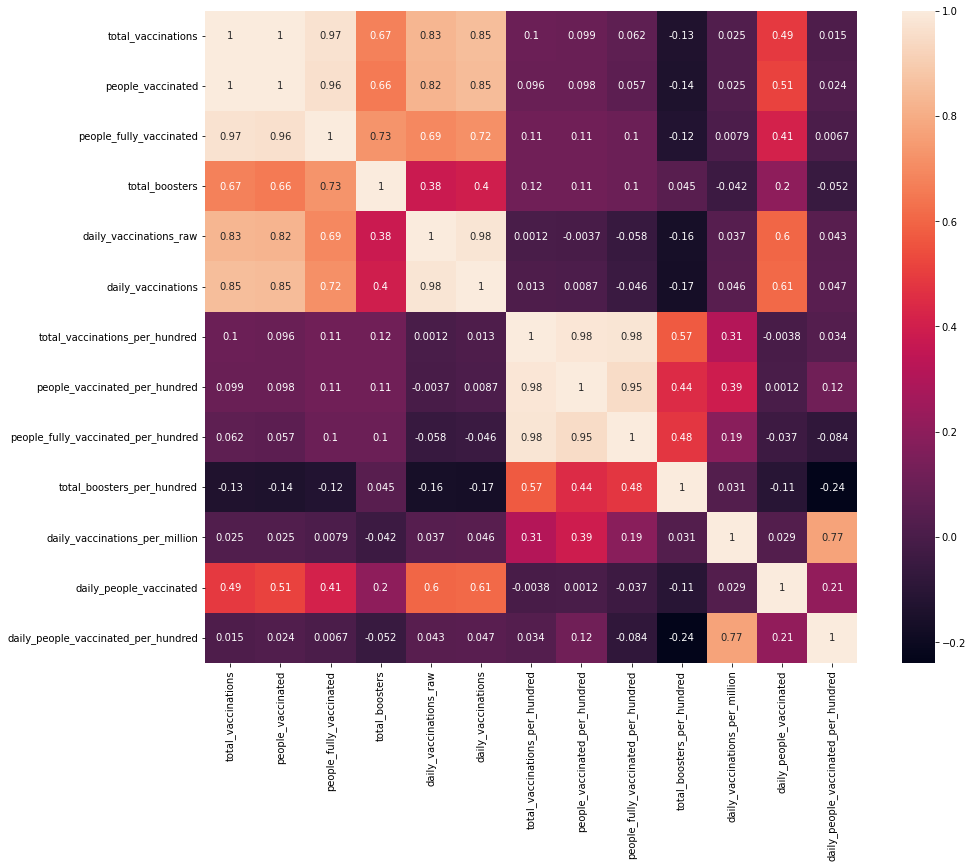

In [10]:
#correlation matrix
plt.subplots(figsize=(16, 12))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()

In [11]:
check_df = check_df.drop(check_df[check_df.total_boosters.isna()].index)
check_df = check_df.drop(check_df[check_df.daily_vaccinations_raw.isna()].index)
check_df = check_df.drop(check_df[check_df.people_fully_vaccinated.isna()].index)
check_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
558,Africa,OWID_AFR,2021-10-28,189937545.0,118977975.0,78376615.0,28870.0,2601239.0,1602003.0,13.83,8.66,5.71,0.00,1166.0,881810.0,0.064
559,Africa,OWID_AFR,2021-10-29,193423963.0,120642649.0,80937779.0,32750.0,3486418.0,2030907.0,14.08,8.78,5.89,0.00,1479.0,1089575.0,0.079
560,Africa,OWID_AFR,2021-10-30,194489257.0,121178206.0,81641956.0,71510.0,1065294.0,1734829.0,14.16,8.82,5.94,0.01,1263.0,878095.0,0.064
561,Africa,OWID_AFR,2021-10-31,196608509.0,122549470.0,82333134.0,71510.0,2119252.0,1680282.0,14.31,8.92,5.99,0.01,1223.0,954742.0,0.070
562,Africa,OWID_AFR,2021-11-01,197965115.0,123239140.0,83005914.0,124228.0,1356606.0,1811508.0,14.41,8.97,6.04,0.01,1319.0,1020902.0,0.074


In [12]:
check_df.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
dtype: int64

In [13]:

# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
# normality test
stat, p = normaltest(check_df['people_fully_vaccinated'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=5131.712, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:
# normality test
stat, p = normaltest(check_df['total_vaccinations_per_hundred'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=191.425, p=0.000
Sample does not look Gaussian (reject H0)


In [15]:
# normality test
stat, p = normaltest(check_df['people_fully_vaccinated_per_hundred'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1705.820, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
from scipy.stats import mannwhitneyu
z,p = mannwhitneyu(check_df['people_vaccinated'], check_df['total_vaccinations'], alternative='two-sided')
# p
print(z)
if p > 0.05:
	print('Not Statistically Different')
else:
	print('Statistically Different')

16323705.0
Statistically Different


In [17]:
from scipy.stats import mannwhitneyu
z,p = mannwhitneyu(check_df['people_vaccinated'], check_df['people_fully_vaccinated'], alternative='two-sided')
# p
print(z)
if p > 0.05:
	print('Not Statistically Different')
else:
	print('Statistically Different')

20964474.0
Statistically Different


In [18]:
from scipy.stats import mannwhitneyu
z,p = mannwhitneyu(check_df['people_fully_vaccinated'], check_df['total_vaccinations'], alternative='two-sided')
# p
print(z)
if p > 0.05:
	print('Not Statistically Different')
else:
	print('Statistically Different')

14488418.5
Statistically Different


In [19]:
from scipy.stats import mannwhitneyu
z,p = mannwhitneyu(check_df['total_vaccinations_per_hundred'], check_df['people_fully_vaccinated_per_hundred'], alternative='two-sided')
# p
print(z)
if p > 0.05:
	print('Not Statistically Different')
else:
	print('Statistically Different')

29847318.5
Statistically Different


In [20]:
from scipy.stats import mannwhitneyu
z,p = mannwhitneyu(check_df['total_vaccinations_per_hundred'], check_df['people_vaccinated_per_hundred'], alternative='two-sided')
# p
print(z)
if p > 0.05:
	print('Not Statistically Different')
else:
	print('Statistically Different')

28251297.5
Statistically Different


In [21]:
from scipy.stats import mannwhitneyu
z,p = mannwhitneyu(check_df['people_vaccinated_per_hundred'], check_df['people_fully_vaccinated_per_hundred'], alternative='two-sided')
# p
print(z)
if p > 0.05:
	print('Not Statistically Different')
else:
	print('Statistically Different')

23060810.5
Statistically Different


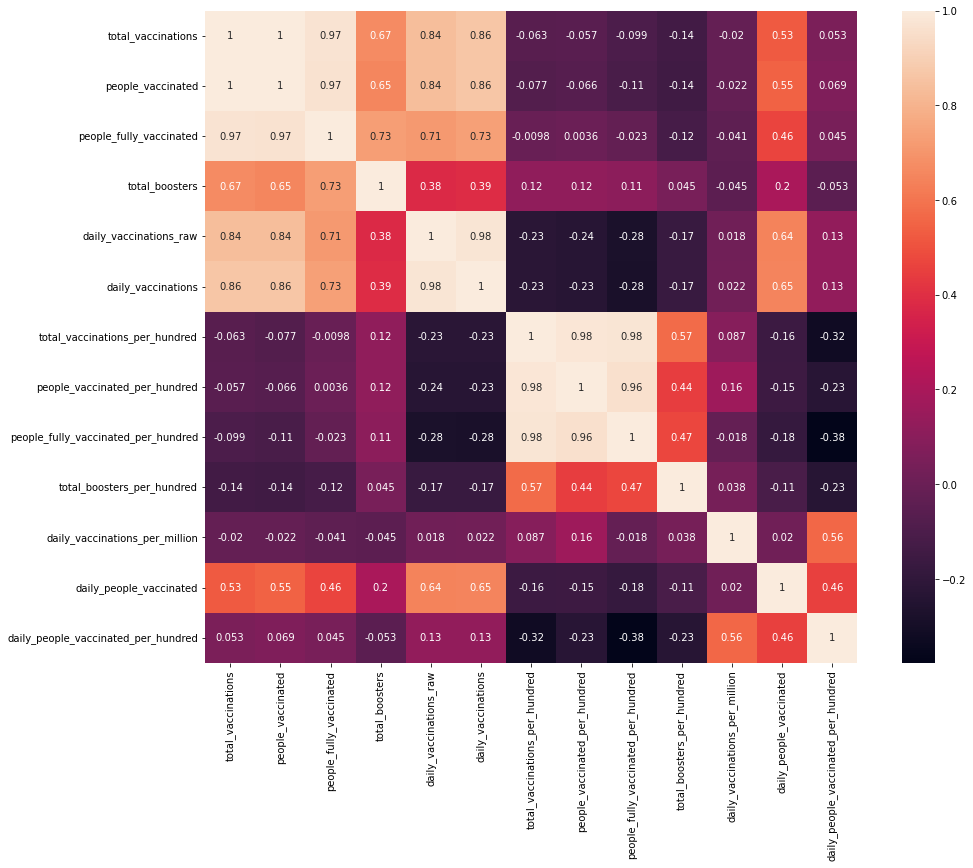

In [22]:
#correlation matrix
plt.subplots(figsize=(16, 12))
sns.heatmap(check_df.corr(), annot=True, square=True)
plt.show()

After Careful analysis by viewing the correlation matrix of the dataset and then proceeding to run a Manu Whithney Statistical Test after obtaining that the correlated pairs were not off a Guissian Distribution. It was established that the highly correlated pairs have different distribution and thus the nans have to be filled with zero as the values cannot be deciphered from them.  

In [23]:
df = vaccinestats

In [24]:
df.people_fully_vaccinated = df.people_fully_vaccinated.fillna(0)
df.people_vaccinated = df.people_vaccinated.fillna(0) #this should not be replaced with zeros. In the project, you need to fill with the appropriate numbers (see hint). 
df.daily_vaccinations_raw = df.daily_vaccinations_raw.fillna(0)
df.daily_vaccinations = df.daily_vaccinations.fillna(0)
df.people_vaccinated_per_hundred = df.people_vaccinated_per_hundred.fillna(0)
df.people_fully_vaccinated_per_hundred = df.people_fully_vaccinated_per_hundred.fillna(0)
df.daily_vaccinations_per_million = df.daily_vaccinations_per_million.fillna(0)
df.total_boosters_per_hundred  = df.total_boosters_per_hundred.fillna(0)
df.daily_people_vaccinated = df.daily_people_vaccinated.fillna(0)
df.daily_people_vaccinated_per_hundred = df.daily_people_vaccinated_per_hundred.fillna(0)
df.total_boosters  = df.total_boosters.fillna(0)
df.isna().sum()

location                               0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
total_boosters                         0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
total_boosters_per_hundred             0
daily_vaccinations_per_million         0
daily_people_vaccinated                0
daily_people_vaccinated_per_hundred    0
dtype: int64

<h2>2 Data Visualization and Exploratory Data Analysis

In [25]:
#Showing Country name without duplicates.
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Eswatini', 'Ethi

In [26]:
World = df.loc[df['location'] == 'World']
World = World[['people_vaccinated_per_hundred','people_fully_vaccinated','daily_vaccinations','date']]
datetime_series = pd.to_datetime(World['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
World = World.set_index(datetime_index)
World.drop('date',axis=1,inplace=True)



In [27]:
Africa = df.loc[df['location'] == 'Africa']
Africa = Africa[['people_vaccinated_per_hundred','daily_vaccinations','date']]
datetime_series = pd.to_datetime(Africa['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Africa = Africa.set_index(datetime_index)
Africa.drop('date',axis=1,inplace=True)


In [28]:
Europe = df.loc[df['location'] == 'Europe']
Europe = Europe[['people_vaccinated_per_hundred','daily_vaccinations','date']]
datetime_series = pd.to_datetime(Europe['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Europe = Europe.set_index(datetime_index)
Europe.drop('date',axis=1,inplace=True)



In [29]:
df1=df
df1.drop( df1[ df1['location'] == 'Europe' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'World' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'Asia' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'European Union' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'High income' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'Upper middle income' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'Lower middle income' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'Upper middle income' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'South America' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'Africa' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'Low income' ].index , inplace=True)
df1.drop( df1[ df1['location'] == 'North America' ].index , inplace=True)












,location,people_vaccinated
0,China,1.225000e+09
1,India,7.669880e+08
2,United States,2.302987e+08
3,Brazil,1.624368e+08
4,Indonesia,1.344183e+08


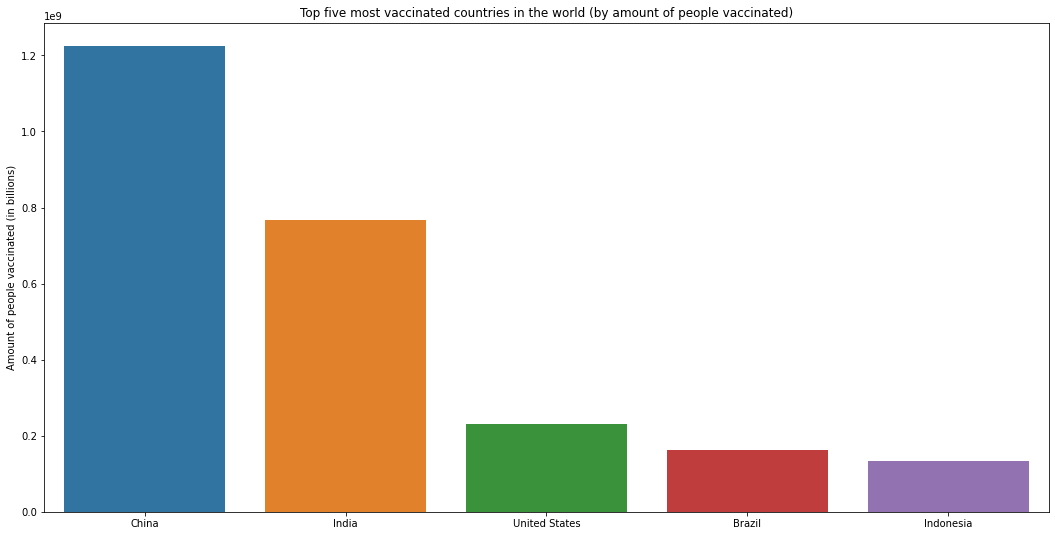

In [30]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_total_vaccinations = df1.groupby('location').people_vaccinated.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.dropna(axis=0).reset_index() # Dropping NaN values

display(total_vaccinations_f[0:5])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(18, 9))
plt.title('Top five most vaccinated countries in the world (by amount of people vaccinated)')
sns.barplot(x=total_vaccinations_f.location[0:5], y=total_vaccinations_f['people_vaccinated'])
plt.rcParams['font.size'] = '18'
plt.xlabel(' ')
plt.ylabel('Amount of people vaccinated (in billions)');

<h3> Top Five Most Vaccinated Countries by the amount of People Vaccinated

This Barplot shows the top 5 countries with the most people vaccinated. The country with the highest people vaccinated is China. This isnt a suprise as they are the most populous country in other words this plot dosent necessarily equate to countries with the best vaccination rate of its citizens. 

,location,people_vaccinated_per_hundred
0,Gibraltar,121.37
1,Pitcairn,100.00
2,United Arab Emirates,98.10
3,Singapore,92.99
4,Brunei,90.56


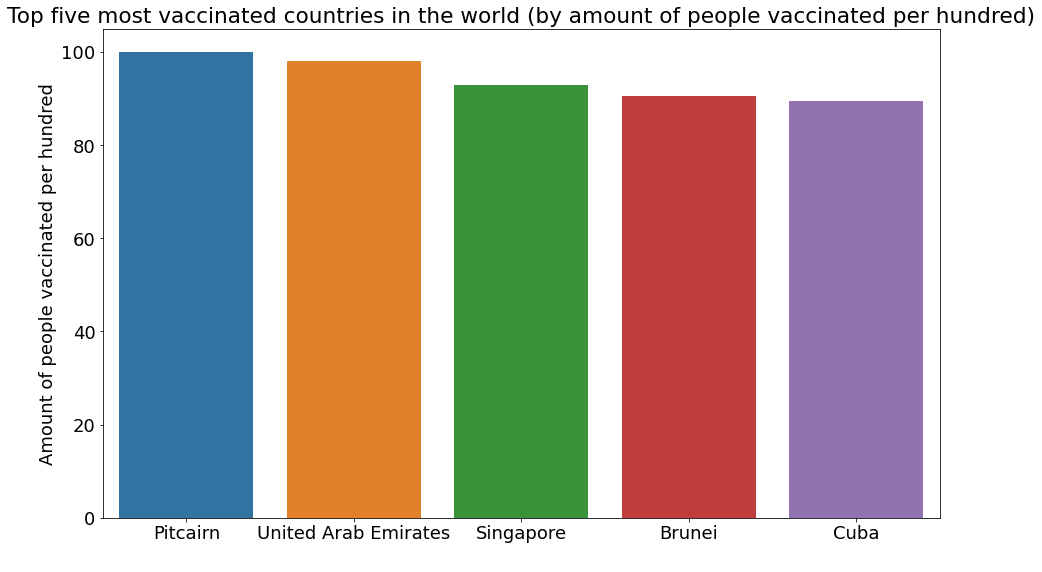

In [31]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_total_vaccinations = df1.groupby('location').people_vaccinated_per_hundred.max().sort_values(ascending=False)
total_vaccinations_f = top_total_vaccinations.dropna(axis=0).reset_index() # Dropping NaN values

display(total_vaccinations_f[0:5])

# Plotting a barplot for data viz using matplotlib and seaborn
plt.figure(figsize=(15, 9))
plt.title('Top five most vaccinated countries in the world (by amount of people vaccinated per hundred)')
sns.barplot(x=total_vaccinations_f.location[1:6], y=total_vaccinations_f['people_vaccinated_per_hundred'])
plt.rcParams['font.size'] = '18'
plt.xlabel(' ')
plt.ylabel('Amount of people vaccinated per hundred');

<h3> Top Five Most Vaccinated Countries by the amount of People Vaccinated per Hundred (AKA most Succeful Vacination Campaigns)

The barplot below shows the top five countries with the most successful vaccination programs. From the table Gibraltar can be seen to have 121.37 people vaccinated per 100 which dosent add up but. Well there are some plausible reasons for that. One is that all Citizens are vaccinated and are now recieving booster shots so i excluded it from the plot. We can also see that the whole nation of Pitcairn is Vaccinated, 

One interesting thing to note is that the Countries with large volumes of people vaccinated havent been able to vaccinate above 91% of the population. This can be attributed to so many factors such as logistics issues due to population, public perception of vaccines, availability of vaccines and others but it is worth noting.

,location,daily_vaccinations
0,China,22424286.0
1,India,10037995.0
2,United States,3499189.0
3,Brazil,2595170.0
4,Japan,1997542.0
...,...,...
219,Burundi,94.0
220,Niue,87.0
221,Montserrat,53.0
222,Tokelau,23.0


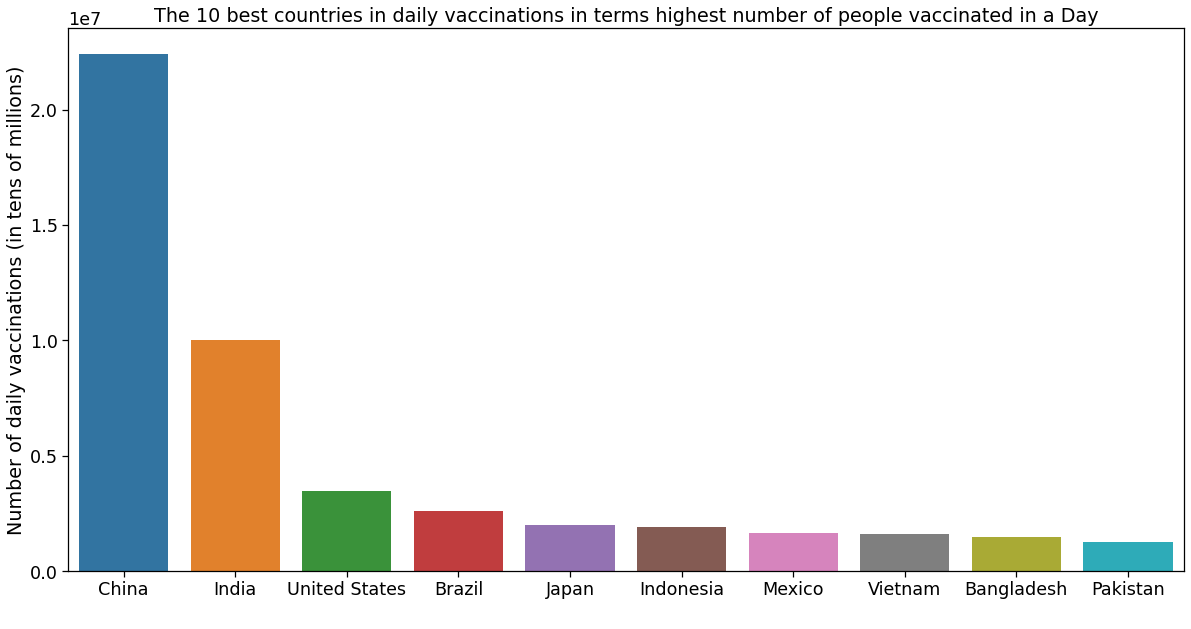

In [32]:
# Grouping the data by country and then sorting the data by the max value from highest to lowest
top_daily = df.groupby('location').daily_vaccinations.max().sort_values(ascending=False)
top_daily_f = top_daily.dropna(axis='rows').reset_index() # Dropping NaN values

display(top_daily_f)



with sns.plotting_context('notebook', font_scale = 1.6):
    plt.figure(figsize=(20, 10))
    plt.title('The 10 best countries in daily vaccinations in terms highest number of people vaccinated in a Day')
    sns.barplot(x=top_daily_f.location[0:10], y=top_daily_f.daily_vaccinations[0:10])
    plt.xlabel(' ')
    plt.ylabel('Number of daily vaccinations (in tens of millions)');

This bar plot represents the top ten countries with the highest number of vaccinations in a day.


,location,date,daily_vaccinations
12679,Indonesia,2021-01-12,0.0
12379,India,2021-01-15,0.0
18365,Mexico,2020-12-24,0.0
14285,Japan,2021-02-17,0.0
31123,Vietnam,2021-03-07,0.0
...,...,...,...
5412,China,2021-06-29,21993000.0
5407,China,2021-06-24,21998714.0
5409,China,2021-06-26,22105857.0
5410,China,2021-06-27,22366286.0


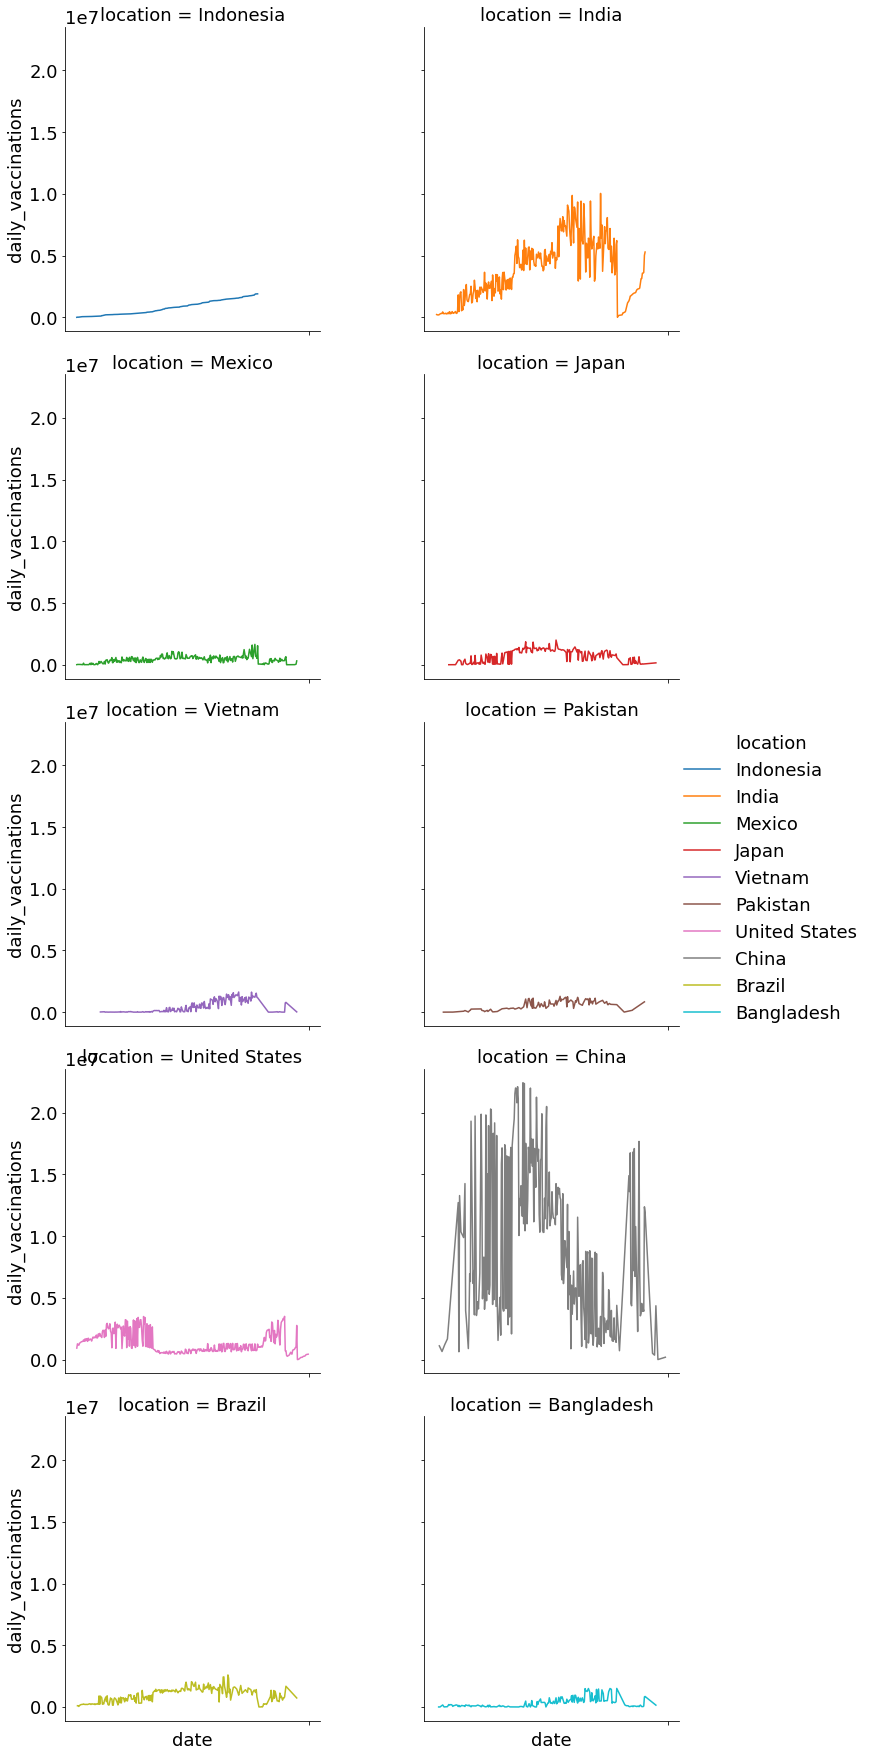

In [33]:
# Establishing which columns are relevant and preparing the dataset
cols = ['location', 'date', 'daily_vaccinations']
covid_df = df.reset_index()

# Creating a list of the aforementioned best performing countries in terms of daily vaccinations
top_10_countries = [
    'China',
    'United States',
    'India',
    'Mexico',
    'Brazil',
    'Japan',
    'Vietnam',
    'Bangladesh',
    'Pakistan',
    'Indonesia',
]

# Filtering and sorting the data
daily_vacc_df = covid_df[['location', 'date', 'daily_vaccinations']].sort_values(by='daily_vaccinations', ascending=True)
top_10_dv_df = daily_vacc_df[daily_vacc_df.location.isin(top_10_countries)].dropna()

display(top_10_dv_df) # verifying that the filtering executed correctly

# Plotting the data in a multi faceted lineplot

#plt.figure(figsize=(18, 32))
sns.relplot(data=top_10_dv_df, x='date', y='daily_vaccinations', hue='location', col='location', kind='line', col_wrap=2)
plt.xticks('');

This plots show us how the number of daily vaccinations flunctuated as the days went by. Firstly it is intersting to note that the daily vaccination trend in indonesia looks to have have started slowly but gradually gained momentum and has been on the rise evr since. Well for China and India the two most populous nations in the world. China had an aggressive vaccination drive as seen in the graphs and peaked early in the year and followed with a drop and is on the rise again and can be attributed to the new varaints which are being found. India had a slow start to its Vaccination drive but saw a rapid rise in its daily vaccinations with it peaking much later after China

The United Sates had a very aggressive approach to vaccination and led to large volumes of daily vaccinations early on but dropped after a while but lately has been on the rise most likely due to new laws imposed and the discovery of new variants. Vietnam trend line seems to start after other trend lines this indicates lack of data on daily vaccinations for that time period and these can be due to a lot of reasons with the most likely being shortage of vaccine as these were still the early stages of vaccine production.

In [34]:
Canada = df.loc[df['location'] == 'Canada']
Canada = Canada[['people_vaccinated_per_hundred','daily_vaccinations','people_vaccinated','date']]
datetime_series = pd.to_datetime(Canada['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Canada = Canada.set_index(datetime_index)
Canada.drop('date',axis=1,inplace=True)

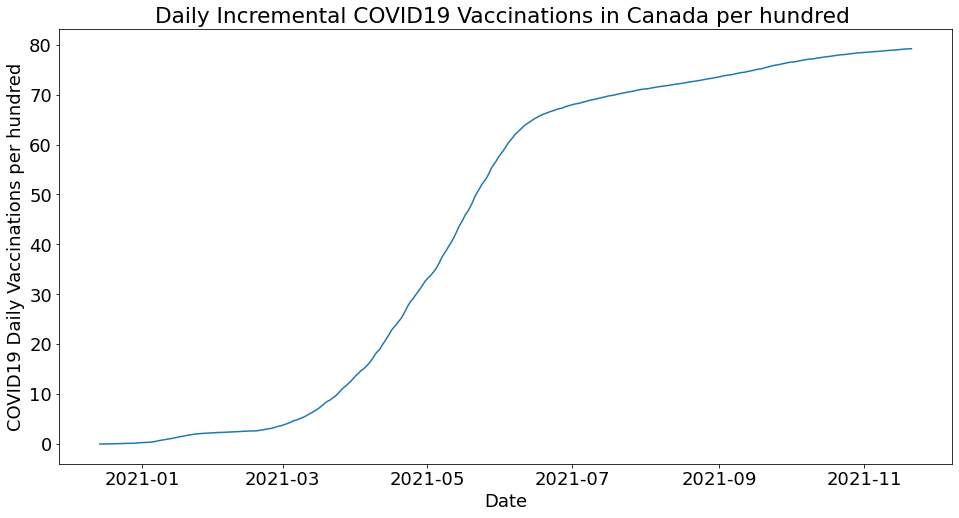

In [35]:
# Daily plot
plt.figure(figsize=(16,8))
plt.plot(Canada.index, Canada.people_vaccinated_per_hundred)

plt.title('Daily Incremental COVID19 Vaccinations in Canada per hundred ')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations per hundred')
plt.show()

This Plot shows the Daily Increase in the vaccinations per hundred. There was a sharp rise in 3 months from 04-2021 to 07-2021 and currently Canada has about 80% of its population vaccinated which is very incredible. 

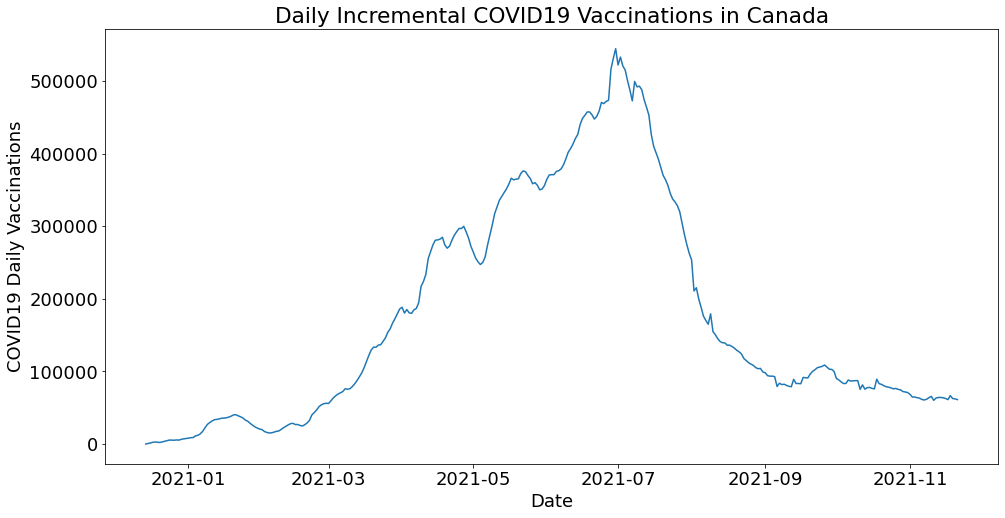

In [36]:
# Daily plot
plt.figure(figsize=(16,8))
plt.plot(Canada.index, Canada.daily_vaccinations)

plt.title('Daily Incremental COVID19 Vaccinations in Canada')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations')
plt.show()

This Plot shows the Daily Increase in the vaccinations. Currently the plot shows that from 08-2021 the daily vaccinations began declining after reaching its peak and has continued this decline to present day. This can be attributed to less number of drastically reduced unvaccinated people available to recieve vaccines.

In [37]:
UK = df.loc[df['location'] == 'United Kingdom']
UK = UK[['daily_vaccinations','people_vaccinated_per_hundred','people_vaccinated','date']]
datetime_series = pd.to_datetime(UK['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
UK = UK.set_index(datetime_index)
UK.drop('date',axis=1,inplace=True)

In [38]:
China = df.loc[df['location'] == 'China']
China = China[['daily_vaccinations','people_vaccinated_per_hundred','date']]
datetime_series = pd.to_datetime(China['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
China = China.set_index(datetime_index)
China.drop('date',axis=1,inplace=True)

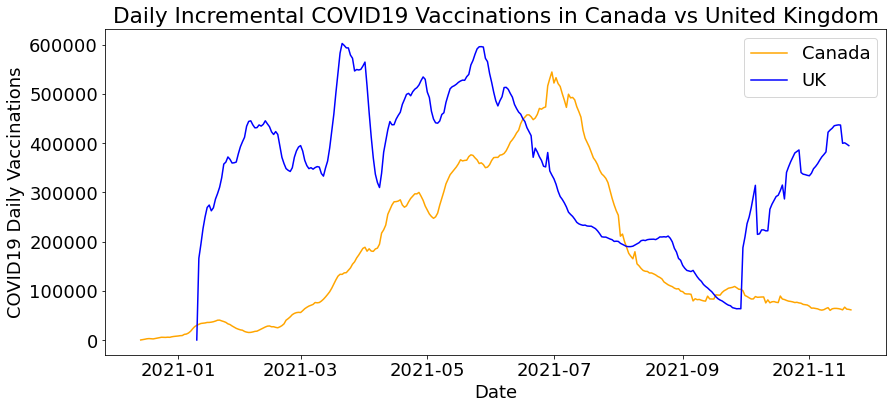

In [39]:
# red dashes, blue squares and green triangles
plt.figure(figsize=(14,6))
plt.plot(Canada.index, Canada.daily_vaccinations, color='orange', label='Canada' )
plt.plot(UK.index, UK.daily_vaccinations, color='blue', label='UK' )
# plt.plot(China.index, China.daily_vaccinations, color='green', label='China' )

plt.title('Daily Incremental COVID19 Vaccinations in Canada vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations')
plt.legend()
plt.show()


Here in this Plot I Compared the two Daily Vaccination Numbers of Canada and United Kingdom whilst i'm not to interested with each countries daily vaccination number. I am kenn to observe when each country recorded their peak and how sustained it was. Canada daily vaccination numbers slowly increases month on month from 01-2021 and peaked in 07-2021 and began a rapid decline.

The rise in the united kingdom daily vaccinations were however rapid with the country recording various peaks in daily vaccinations from 03-2021 to 06- 2021. A particular factor to consider is that influenced the United Kingdom daily vaccinations is the supply of vaccines as the UK had to deal with shortages in vaccine supply in 04-2021 which led to the drop in daily vaccines. Also the current trend suggests that the UK is still having way higher daily vaccination trends than camnada this is due to the various variants which afflicted UK more than any other country and with the emergence of the OMICRON variant, It would be expected that both countrie would show an upward trend in Daily Vaccinations.

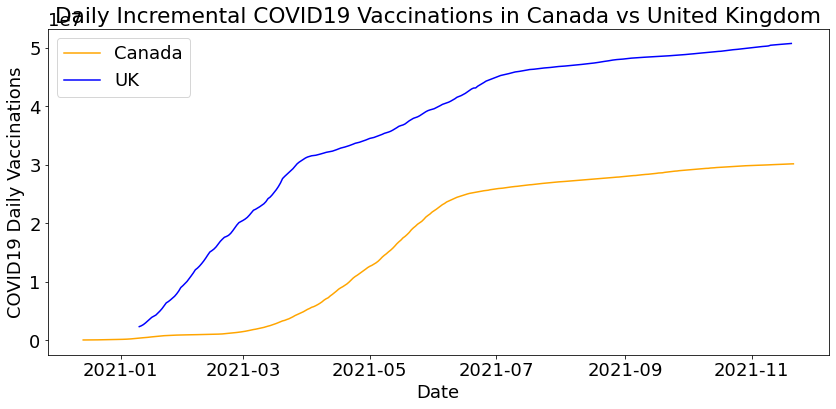

In [40]:
# red dashes, blue squares and green triangles
plt.figure(figsize=(14,6))
plt.plot(Canada.index, Canada.people_vaccinated, color='orange', label='Canada' )
plt.plot(UK.index, UK.people_vaccinated, color='blue', label='UK' )
# plt.plot(China.index, China.daily_vaccinations, color='green', label='China' )

plt.title('Daily Incremental COVID19 Vaccinations in Canada vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations')
plt.legend()
plt.show()

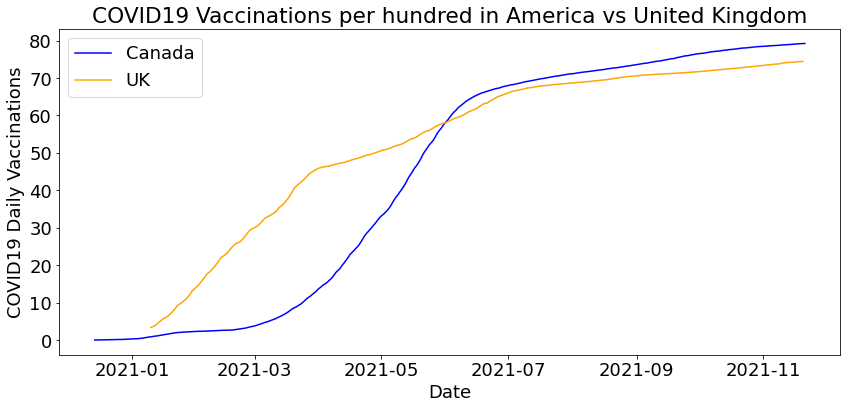

In [41]:
# red dashes, blue squares and green triangles
plt.figure(figsize=(14,6))
plt.plot(Canada.index, Canada.people_vaccinated_per_hundred, color='blue', label='Canada')
plt.plot(UK.index, UK.people_vaccinated_per_hundred, color='orange',label='UK' )
#plt.plot(China.index, China.people_vaccinated_per_hundred)

plt.title('COVID19 Vaccinations per hundred in America vs United Kingdom')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations')
plt.legend()
plt.show()

This plot compares two Countries Vaccination Program in terms of People Vaccinated per Hundred. This plot shows that The United Kingdom came out of the blocks fast with their vaccination drive with 50% vaccinated as early as 04-2021. Canada began its drive slowly and steadily and surpassed the UK in 06-2021 and never looked back. Presently Canada has more people vaccinated per hundred than the United Kingdom.

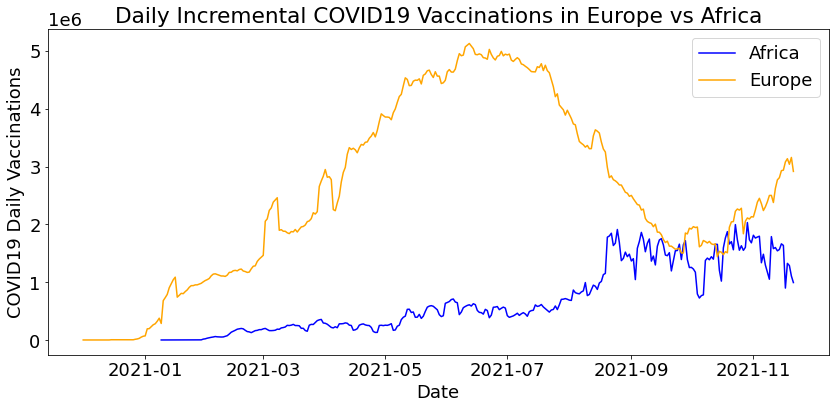

In [42]:
# red dashes, blue squares and green triangles
plt.figure(figsize=(14,6))
# plt.plot(Canada.index, Canada.daily_vaccinations)
# plt.plot(America.index, America.daily_vaccinations)
plt.plot(Africa.index, Africa.daily_vaccinations, color='blue',label='Africa' )
plt.plot(Europe.index, Europe.daily_vaccinations, color='orange', label='Europe')


plt.title('Daily Incremental COVID19 Vaccinations in Europe vs Africa')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations')
plt.legend()
plt.show()

As much as this is a pandemic It cannot be resolved if Everyone isn't vaccinated so it was therefore imperative to look at the vaccination rates among continents. I decided to consider Africa and Europe and the results arent encouraging.

The plot shows that the highest daily vaccination number of the Africa is at about 2million compared to 5million for europe. The trend also shows that africa has remained in the bracket of between 0-2million daily vaccinations from 01-2021 till date and this is more worrisome when you considerthe United States has reached daily vaccination figures of over 3 million vaccinations per day. For context the population of United States is a little over 300 million and that of Africa is above 1.2Billion

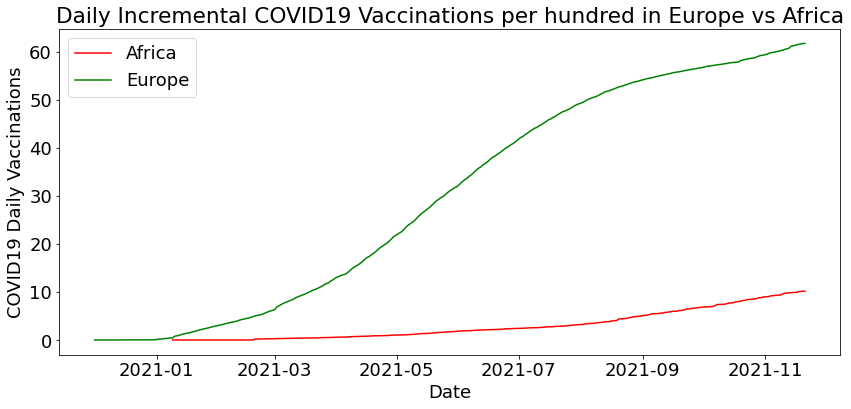

In [43]:
# red dashes, blue squares and green triangles
plt.figure(figsize=(14,6))
# plt.plot(Canada.index, Canada.daily_vaccinations)
# plt.plot(America.index, America.daily_vaccinations)
plt.plot(Africa.index, Africa.people_vaccinated_per_hundred, color='red', label='Africa')
plt.plot(Europe.index, Europe.people_vaccinated_per_hundred, color='green',label='Europe')


plt.title('Daily Incremental COVID19 Vaccinations per hundred in Europe vs Africa')
plt.xlabel('Date')
plt.ylabel('COVID19 Daily Vaccinations')
plt.legend()
plt.show()

I also looked at the two continents to find out the people vaccinated per hundred in each continent. This shows the world still has a long way to go but the disparity is glaring as Africa dosent even have up to 15 people per hundred vaccination. Well the data for europe is more encouraging with above 60 people per hundred vaccinated and its encouraging. These plots show that though that there me light at the end of the tummel more work would need to be done in terms of vaccination of the entire world if we are to over come this pandemic through vaccination.

The Emergence of Variants have further byttressed the need for equitable distribution of vaccines and data anlyticcs would be a driving force to visualize thewe process and offer insights on areas to improve.

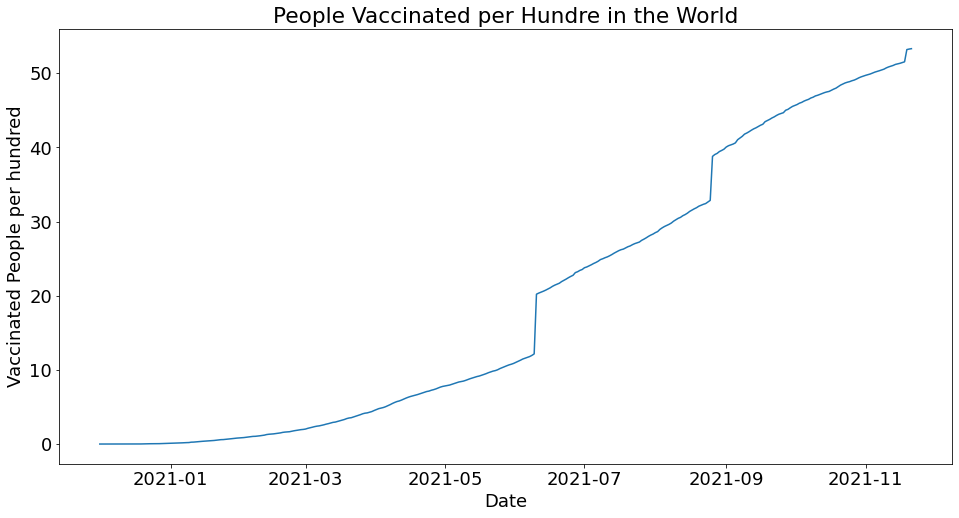

In [44]:
# Daily plot
plt.figure(figsize=(16,8))
plt.plot(World.index, World.people_vaccinated_per_hundred)

plt.title('People Vaccinated per Hundre in the World')
plt.xlabel('Date')
plt.ylabel('Vaccinated People per hundred')
plt.show()

Finally We see that for th whole world we are 50 people per hundred so more work needs to be done

<h2>3 Model selection and fitting to data

After Data Visualization of The Two Countries of whom I intend to to Predict the vaccination rates into the future. I decided to use the People Vaccinated per Hundred as the feature to predict and compare theses two countries. The reason being is that different countries have varying populations and It would be unwise to not consider that when comparing the vaccination rate of each country. Therefore a better metric is the People vaccinated per hundred as the max 100 is equal for all countries.


In this part, I select an ARIMA model that will allow us to project the time series of COVID-19 Vaccination into the future. 

An **ARIMA model** is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time-series data, and as such provides a simple yet powerful method for making skilful time-series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

In our work since the Covid-19 vaccination is a time series analysis, I select this model which is a very powerful model for predicting the future of time series analysis efficiently.

The parameters of the ARIMA model are defined as follows:

**p**: The number of lag observations included in the model, also called the lag order.

**d**: The number of times that the raw observations are differenced, also called the degree of differencing.

**q**: The size of the moving average window, also called the order of moving average.

At the first step, I want to find the best ARIMA parameters for our time series analysis. The pyramid-arima library for Python allows us to quickly perform this **grid search** and even creates a model object that you can fit to the training data.
This library contains an **auto_arima function** that allows us to set a range of p,d,q,P,D,and Q values and then fit models for all the possible combinations. Then the model will keep the combination that reported back the best AIC value. Where the AIC value will allow us to compare how well a model fits the data and takes into account the complexity of a model, so models that have a better fit while using fewer features will receive a better (lower) AIC score than similar models that utilize more features.

In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from scipy.ndimage.interpolation import shift
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt

In [106]:
Canada1 = df.loc[df['location'] == 'Canada']
Canada1 = Canada1[['people_vaccinated_per_hundred','daily_vaccinations','date','people_fully_vaccinated_per_hundred']]
datetime_series = pd.to_datetime(Canada1['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Canada1 = Canada1.set_index(datetime_index)
Canada1.drop('date',axis=1,inplace=True)

In [107]:
#Get the values from the column where vaccination rate of Canada (or country of your choice) is stored.
val = Canada1['people_fully_vaccinated_per_hundred'].values

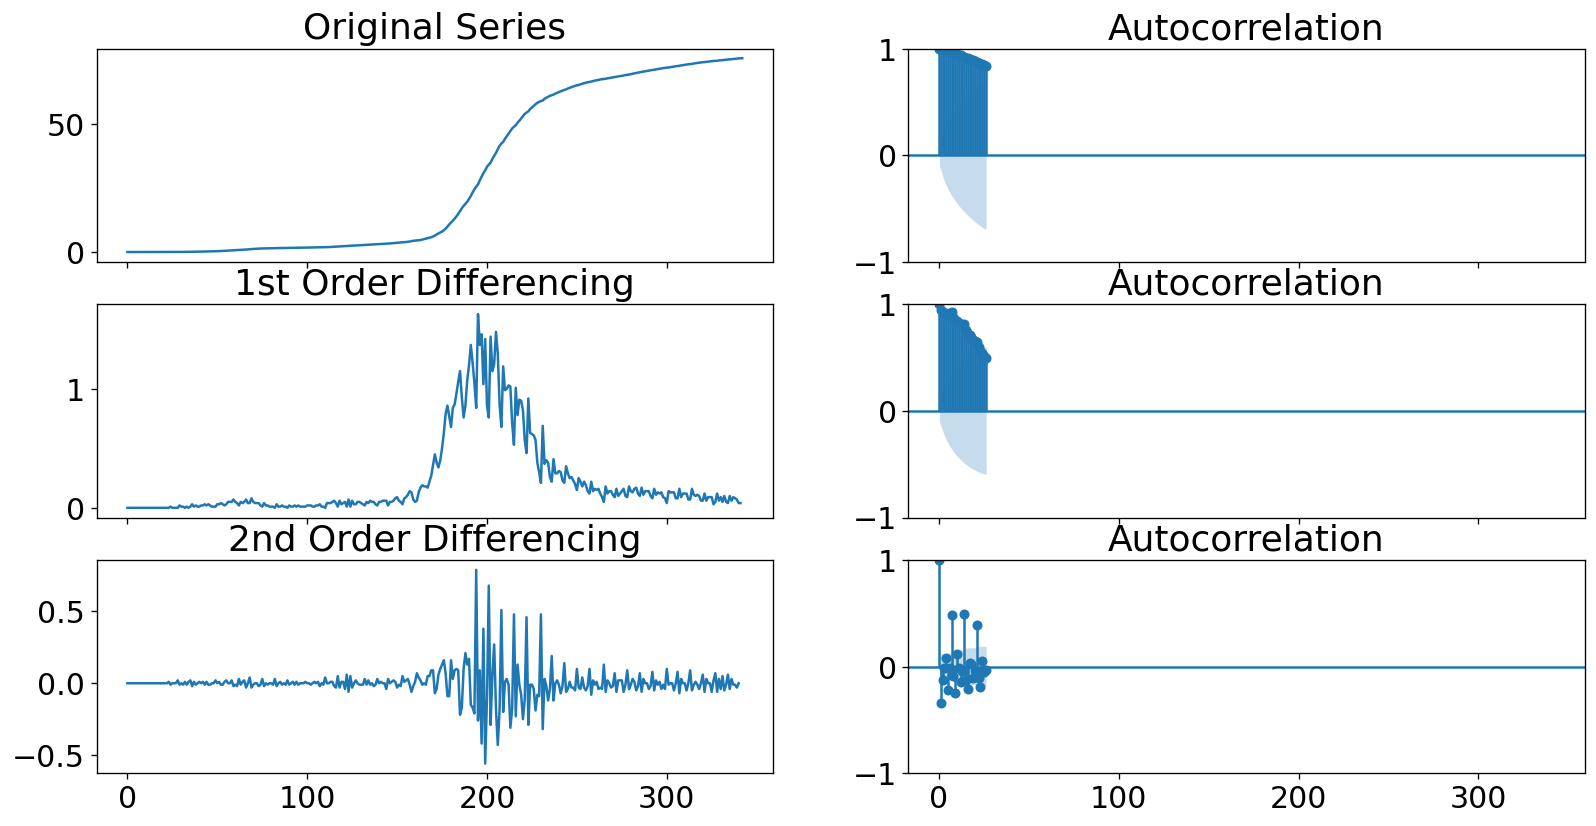

In [108]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
difffval = np.diff(diffval)


plt.show()



In [109]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1, 
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=2, # let model determine 'd'
start_P=0,
stationary = False,                      
D=0, 
alpha=0.05,                      
trace=True,                     
error_action='ignore',
suppress_warnings=True,
stepwise=True)
# model = pm.auto_arima(val, trace=True, suppress_warning=True, alpha = 0.1)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-586.585, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-506.733, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-547.261, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-585.958, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-588.080, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-570.764, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-587.511, Time=0.08 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-633.972, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-585.950, Time=0.16 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-585.887, Time=0.17 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-621.467, Time=0.26 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-635.232, Time=0.22 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-587.438, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-587.399, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept

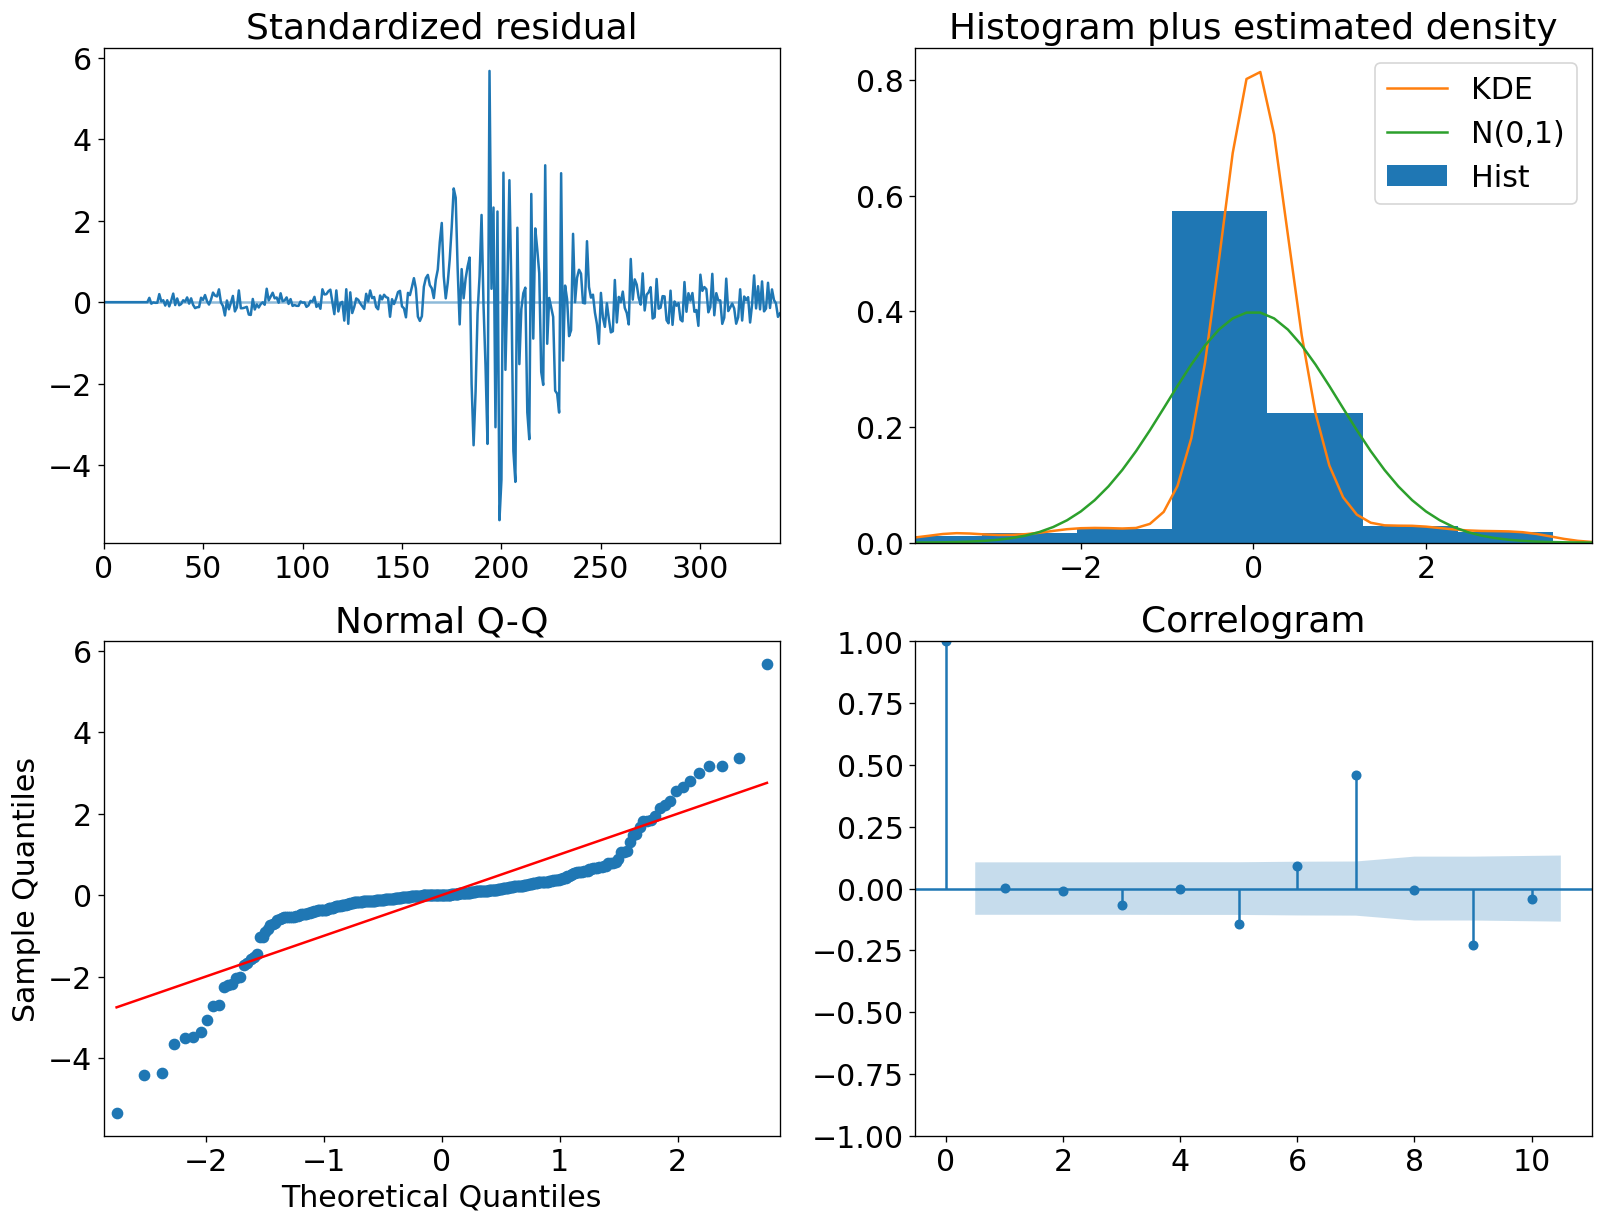

In [110]:
model.plot_diagnostics(figsize=(16,12))
plt.show()

So the residuals are statinary, normally distributed with zero mean, and are uncorrelated with lagged versions of itself.

As you can also see the Theoretical Quantiles and Sample Quantiles follow the same direction

There is an outlier in the right and left tail in the Q-Q plot, but otherwise everyting looks good.

We almost finished all necessary steps. Then we can forecast the vaccination rate now.




In presenting my best and worst case scenario, I have to consider that the vaccination rate of the countries cannot go backwards. Therefore I have to increase my alpha value thereby lowering my confidence interval inorder to get a worst case vwhere by the vaccination rate per hundred predicted dosen't reduce from the last known people vaccinated per hundred.


It is important to clarify that changing the alpha value dosent affect the original prediction result rather the confidence interval is obtained from the prediction results. Therefore our model is still valid tarher we just have to be careful in specifying a best case and worst case scenario.

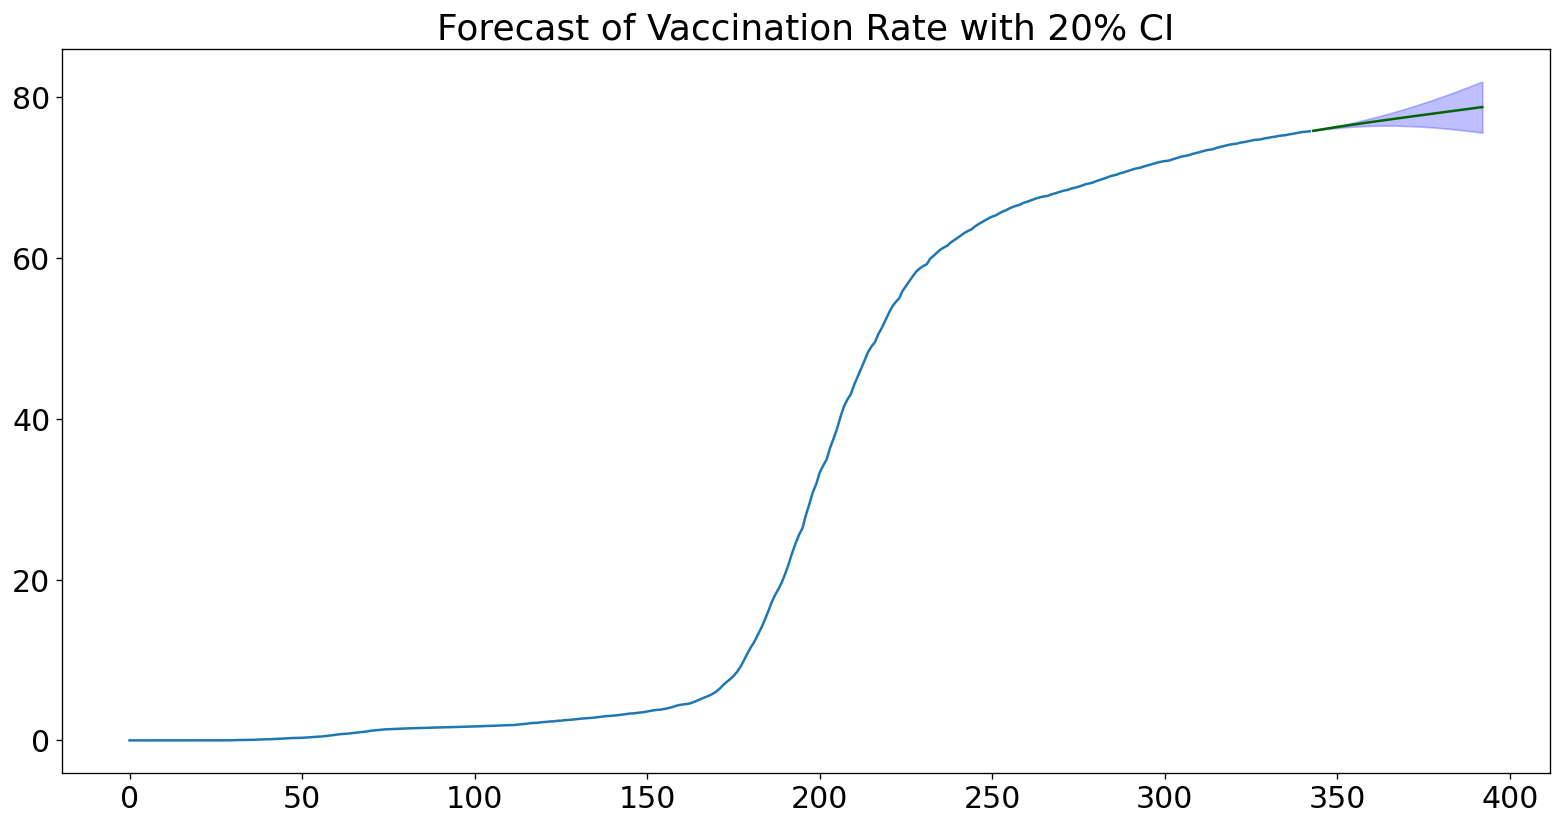

In [111]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha =0.8)
index_of_fc = np.arange(len(val), len(val)+n_periods)


# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.25)
plt.title("Forecast of Vaccination Rate with 20% CI")
plt.show()

In [112]:
confint

array([[75.83206415, 75.87951385],
       [75.8870347 , 75.96614594],
       [75.94324227, 76.04938746],
       [75.99830233, 76.13178224],
       [76.05133456, 76.21435814],
       [76.1018622 , 76.29772853],
       [76.14959124, 76.38231393],
       [76.19433504, 76.46841814],
       [76.23597834, 76.55626491],
       [76.27445583, 76.64601999],
       [76.30973775, 76.73780617],
       [76.34181974, 76.83171396],
       [76.37071555, 76.9278094 ],
       [76.39645185, 77.02613966],
       [76.41906451, 77.12673729],
       [76.43859587, 77.2296233 ],
       [76.45509275, 77.33480952],
       [76.46860507, 77.44230037],
       [76.47918468, 77.55209428],
       [76.48688464, 77.66418477],
       [76.49175857, 77.77856136],
       [76.4938602 , 77.89521027],
       [76.49324301, 78.014115  ],
       [76.48995994, 78.13525686],
       [76.48406323, 78.25861534],
       [76.4756042 , 78.38416847],
       [76.4646332 , 78.51189313],
       [76.45119943, 78.64176527],
       [76.43535096,

Here our model predicts that in the best case with an alpha of 0.9 the highest vaccination rate possible in the next 50 days is 82.39 people per hundred and worstcase is 78.81 and the base prediction the mean between the two. 

In [53]:
UK1 = df.loc[df['location'] == 'United Kingdom']
UK1 = UK1[['people_vaccinated_per_hundred','date']]
datetime_series = pd.to_datetime(UK1['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
UK1 = UK1.set_index(datetime_index)
UK1.drop('date',axis=1,inplace=True)

In [54]:
#Get the values from the column where vaccination rate of Canada (or country of your choice) is stored.
val = UK1['people_vaccinated_per_hundred'].values

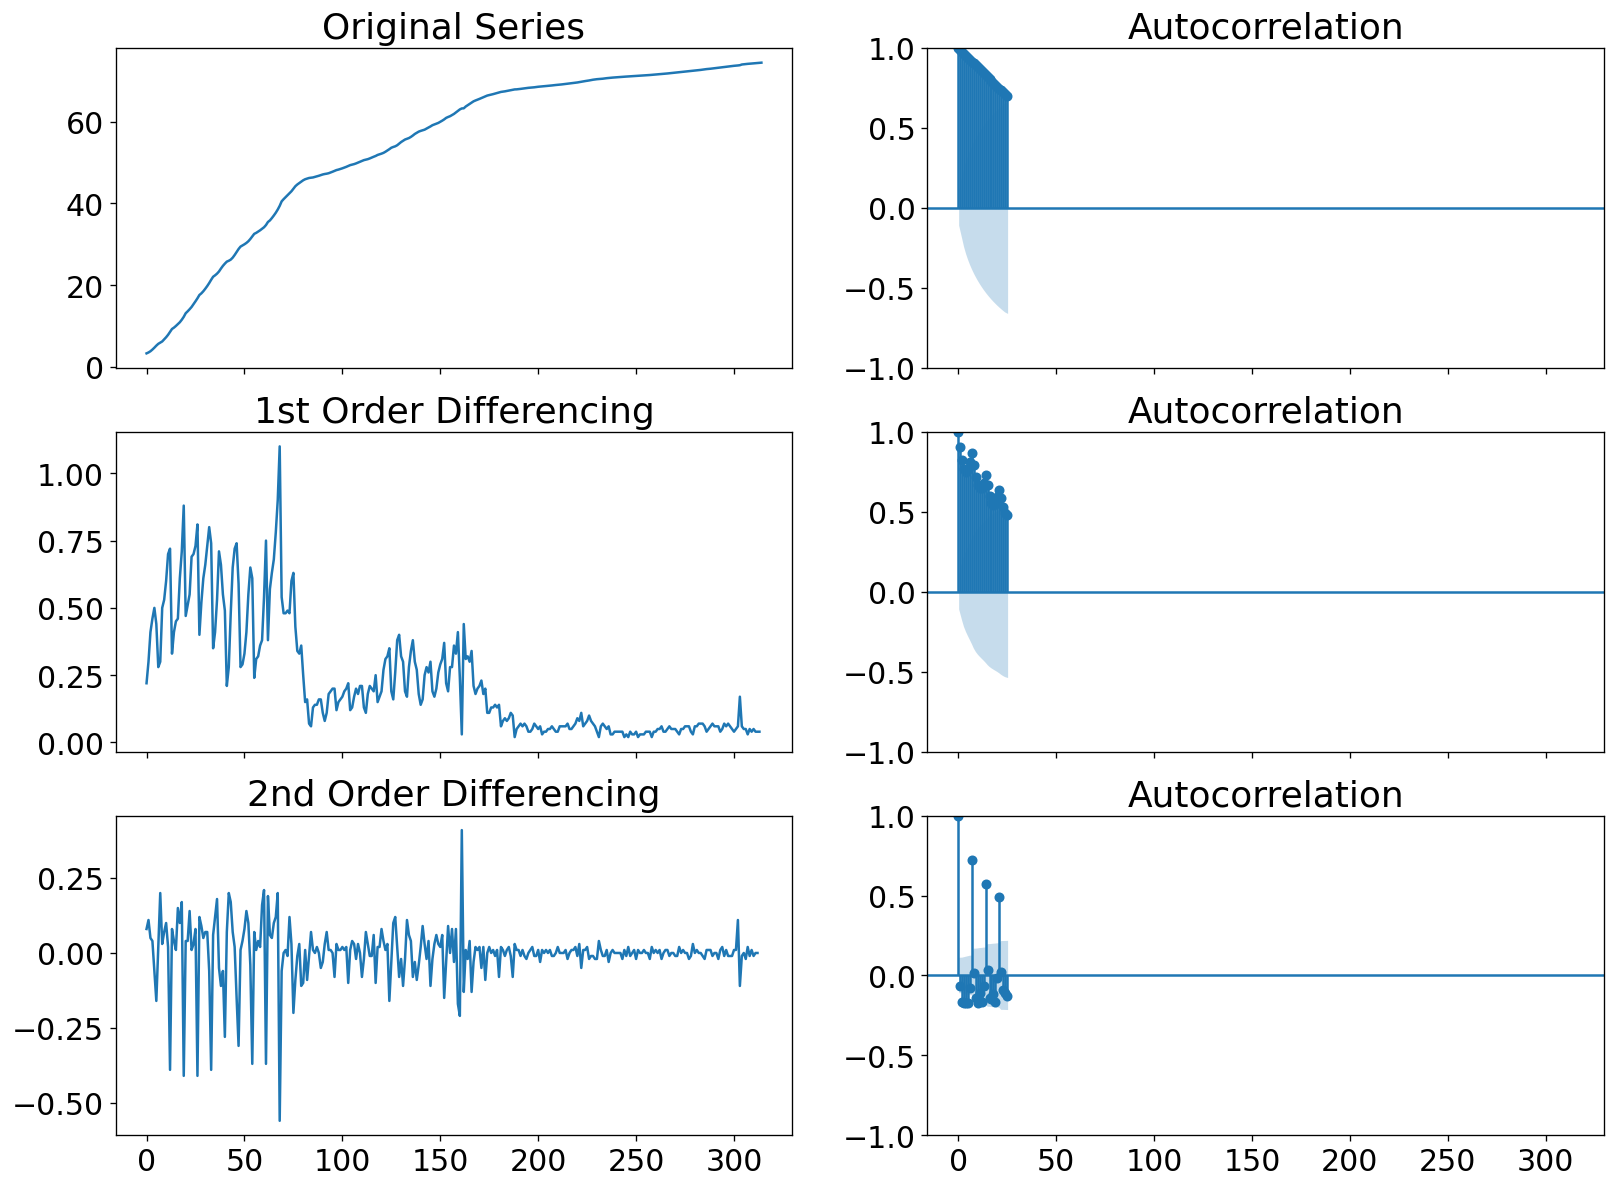

In [55]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(16,12), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val); axes[0, 0].set_title('Original Series')
plot_acf(val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(val)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(val), ax=axes[1, 1])
diffval = np.diff(val)

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

In [56]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(val, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
alpha=0.01,                    
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
#stepwise_fit = pm.auto_arima(val, trace=True, suppress_warning=True)
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-624.767, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-589.801, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-589.279, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-590.188, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-591.789, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-620.456, Time=0.27 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-625.859, Time=0.09 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-634.215, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-635.517, Time=0.31 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-715.816, Time=0.36 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-638.046, Time=0.28 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-695.078, Time=0.40 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-669.473, Time=0.37 sec
 ARIMA(2,2,3)(0,0,0)[0]             : 

The best model chosen is : ARIMA (p,d,q) = ARIMA(2,2,3).

As we assumed, second order differencing has to be performed for making the time series stationary in this scenario.

As the next step, perform diagnostic check for the residual as given below:



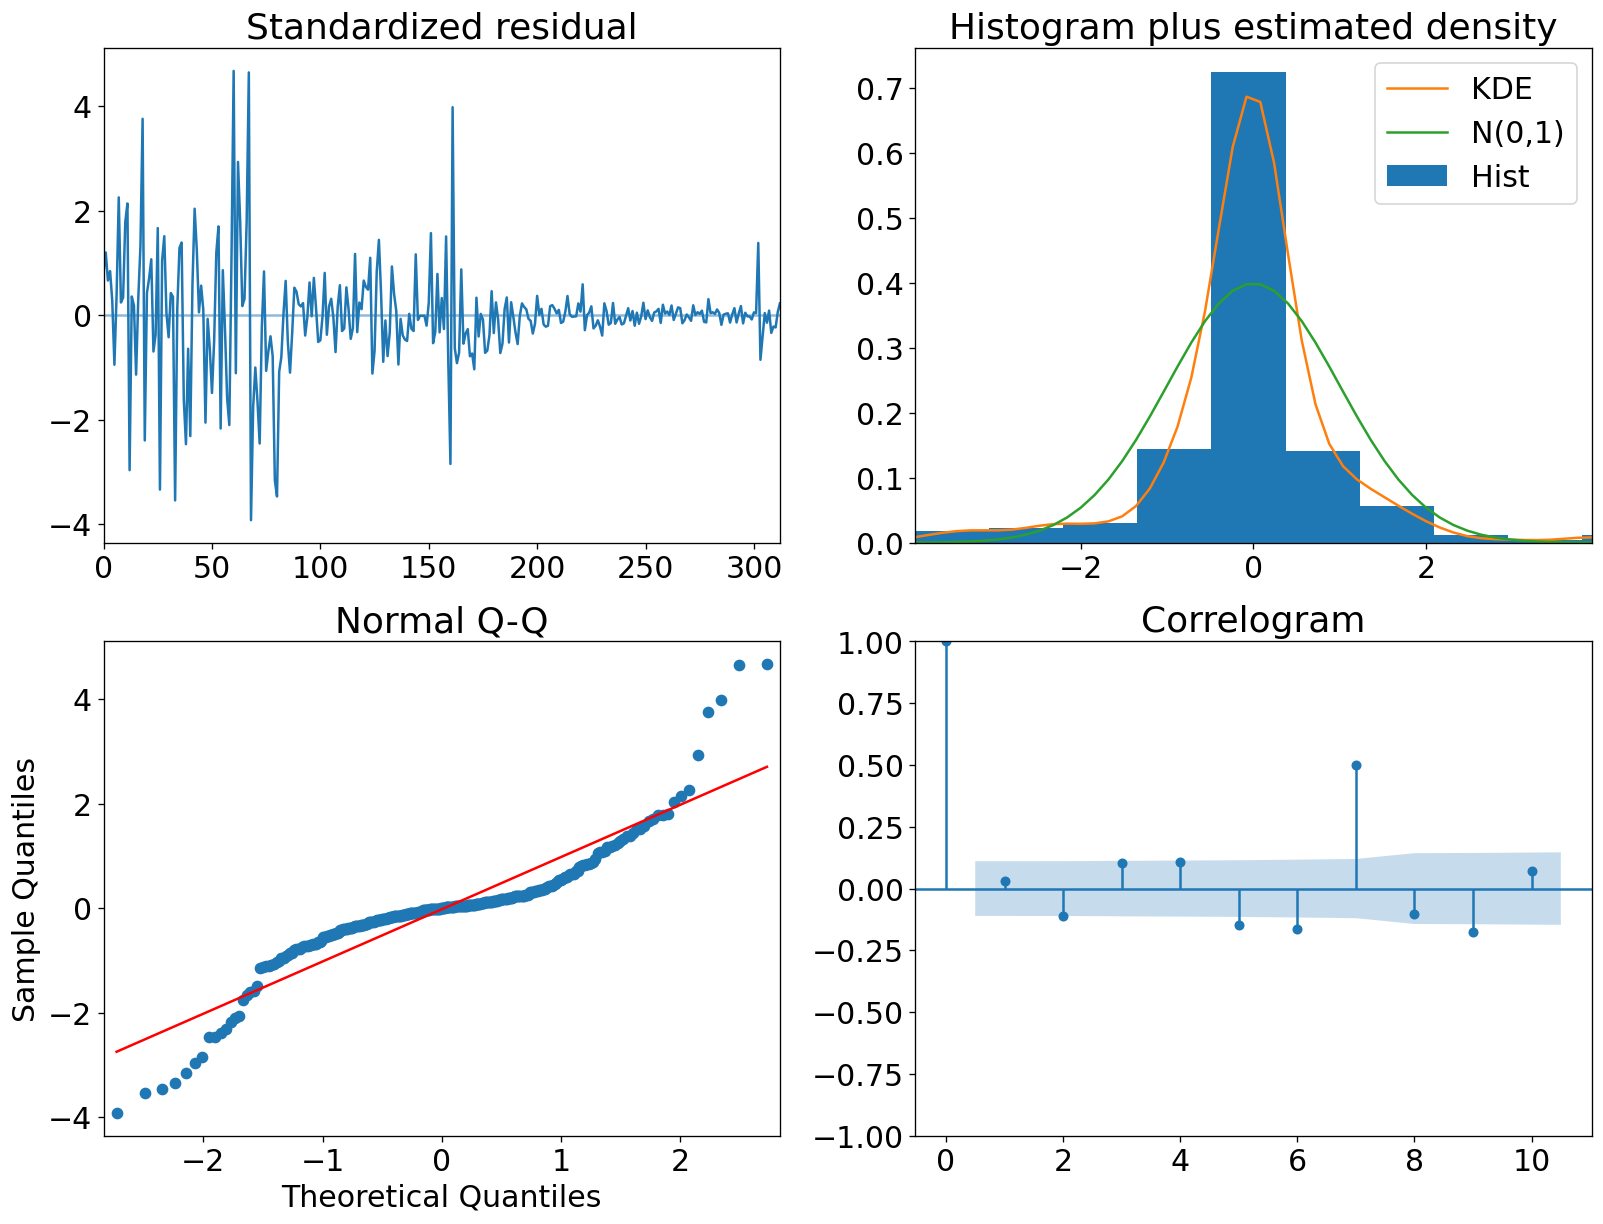

In [57]:
model.plot_diagnostics(figsize=(16,12))
plt.show()

So the residuals are statinary, normally distributed with zero mean, and are uncorrelated with lagged versions of itself.

As you can also see the Theoretical Quantiles and Sample Quantiles follow the same direction

There is an outlier in the right and left tail in the Q-Q plot, but otherwise everyting looks good.

We almost finished all necessary steps. Then we can forecast the vaccination rate now.



In presenting my best and worst case scenario, I have to consider that the vaccination rate of the countries cannot go backwards. Therefore I have to increase my alpha value thereby lowering my confidence interval inorder to get a worst case vwhere by the vaccination rate per hundred predicted dosen't reduce from the last known people vaccinated per hundred 

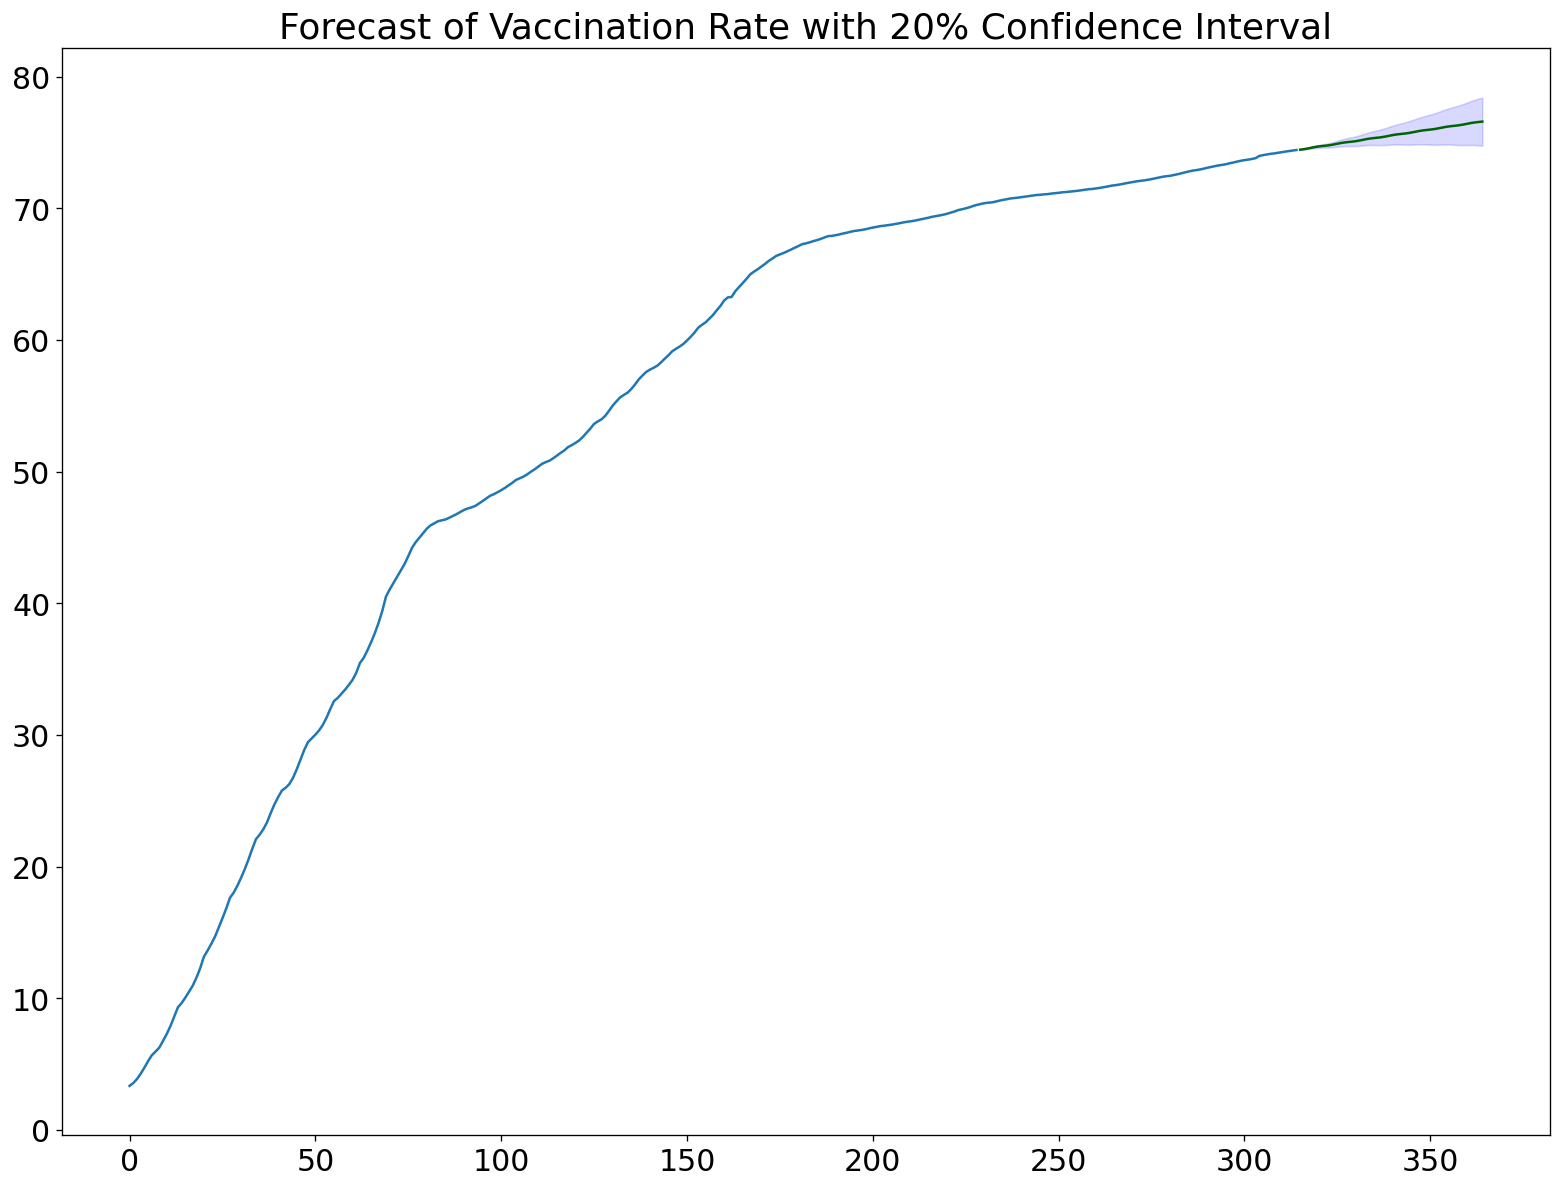

In [58]:
# Forecast
n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True, alpha =0.8)
index_of_fc = np.arange(len(val), len(val)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(val)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("Forecast of Vaccination Rate with 20% Confidence Interval")
plt.show()

In [59]:
confint

array([[74.4286802 , 74.46658733],
       [74.44852446, 74.5183178 ],
       [74.48047039, 74.58562287],
       [74.52066791, 74.6628503 ],
       [74.55824087, 74.73780625],
       [74.5834689 , 74.80100441],
       [74.59513632, 74.85270583],
       [74.60135181, 74.90266778],
       [74.61334585, 74.96277985],
       [74.63701988, 75.03811378],
       [74.66857305, 75.12315687],
       [74.69746082, 75.20601062],
       [74.71444323, 75.27729911],
       [74.71859802, 75.33710144],
       [74.71797624, 75.39478479],
       [74.72347651, 75.46190441],
       [74.74063838, 75.54351122],
       [74.7655306 , 75.63440865],
       [74.78778593, 75.72313111],
       [74.79846959, 75.80057057],
       [74.79682318, 75.8667482 ],
       [74.79079063, 75.93070143],
       [74.79098141, 76.0036273 ],
       [74.80268265, 76.09045916],
       [74.82193463, 76.18621172],
       [74.83858149, 76.27980193],
       [74.84396476, 76.3624012 ],
       [74.83744188, 76.43401556],
       [74.82682007,

Here our model predicts that in the best case with an alpha of 0.8 the highest vaccination rate possible in the next 50 days is 78.40 people per hundred and worstcase is 74.75 and the base prediction the mean between the two. 

<h2>4 Relating COVID-19 Vaccine Rates to a Second Dataset

I would like to Explore the Relationship between people vaccinated and the number of new cases, deaths and number of hospital patients in the different Countries. It is worthwhile to note that the People vaccinated per hundred is derived from the ratio of people vaccinated divided by the polpulation * 100. 

I am using the the People Vaccinated value to compare with theses other factors as the other factors are not in ratios and are relative for each country. I decided to compare Canada and United Kingdom 



In [60]:
worldstats = pd.read_csv('Downloads/Complete_covid19_dataset.csv')
worldstats

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134454,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134455,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134456,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134457,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


<h3>Cleaning Data for my Second Data Set

In [61]:
Total = worldstats.loc[worldstats['location'] == 'Canada']
Total

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
21310,CAN,North America,Canada,2020-01-26,1.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,-580.3,-2.28,-1.97,-15.243809
21311,CAN,North America,Canada,2020-01-27,1.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21312,CAN,North America,Canada,2020-01-28,2.0,1.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21313,CAN,North America,Canada,2020-01-29,2.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21314,CAN,North America,Canada,2020-01-30,2.0,0.0,NaN,NaN,NaN,NaN,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21969,CAN,North America,Canada,2021-11-15,1760822.0,4370.0,2497.714,29435.0,50.0,27.000,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21970,CAN,North America,Canada,2021-11-16,1762638.0,1816.0,2419.429,29458.0,23.0,26.429,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21971,CAN,North America,Canada,2021-11-17,1765164.0,2526.0,2400.714,29485.0,27.0,26.000,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN
21972,CAN,North America,Canada,2021-11-18,1767962.0,2798.0,2594.571,29516.0,31.0,28.429,...,12.0,16.6,NaN,2.5,82.43,0.929,NaN,NaN,NaN,NaN


In [62]:

Total = Total[['new_deaths','date', 'new_cases_smoothed','people_vaccinated','hosp_patients']]
datetime_series = pd.to_datetime(Total['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Total = Total.set_index(datetime_index)
Total.drop('date',axis=1,inplace=True)
Total = Total[['people_vaccinated','new_deaths','new_cases_smoothed','hosp_patients']]

In [63]:
Total

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
2020-01-26,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-11-15,30069875.0,50.0,2497.714,1590.0
2021-11-16,30082576.0,23.0,2419.429,1762.0
2021-11-17,30102545.0,27.0,2400.714,1731.0
2021-11-18,30121803.0,31.0,2594.571,1699.0


In [64]:
Total = Total.drop(Total[Total.people_vaccinated.isna()].index)
Total.tail()

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
2021-11-15,30069875.0,50.0,2497.714,1590.0
2021-11-16,30082576.0,23.0,2419.429,1762.0
2021-11-17,30102545.0,27.0,2400.714,1731.0
2021-11-18,30121803.0,31.0,2594.571,1699.0
2021-11-19,30136287.0,17.0,2436.143,NaN


In [65]:
Total.isna().sum()

people_vaccinated     0
new_deaths            0
new_cases_smoothed    0
hosp_patients         1
dtype: int64

In [66]:
Total = Total.drop(Total[Total.hosp_patients.isna()].index)
Total.tail()

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
2021-11-14,30050442.0,9.0,2558.429,1613.0
2021-11-15,30069875.0,50.0,2497.714,1590.0
2021-11-16,30082576.0,23.0,2419.429,1762.0
2021-11-17,30102545.0,27.0,2400.714,1731.0
2021-11-18,30121803.0,31.0,2594.571,1699.0


In [67]:
def plot_data_corr(df,title,color="green"):    
    r = display_correlation(df)
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns)-1,figsize=(14,3))
    for i in range(1,len(df.columns)):
        ax[i-1].scatter(df['people_vaccinated'],df.values[:,i],color=color)
        ax[i-1].title.set_text(title[i] +'\n r = ' + 
                             "{:.2f}".format(r.values[0,i]))
        ax[i-1].set(xlabel=df.columns[0],ylabel=df.columns[i])
    fig.subplots_adjust(wspace=.5)    
    plt.show()

In [68]:
def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("pearson Correlation")
    return(r)

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
people_vaccinated,1.000000,-0.644468,-0.580881,-0.670919
new_deaths,-0.644468,1.000000,0.576196,0.735601
new_cases_smoothed,-0.580881,0.576196,1.000000,0.904057
hosp_patients,-0.670919,0.735601,0.904057,1.000000


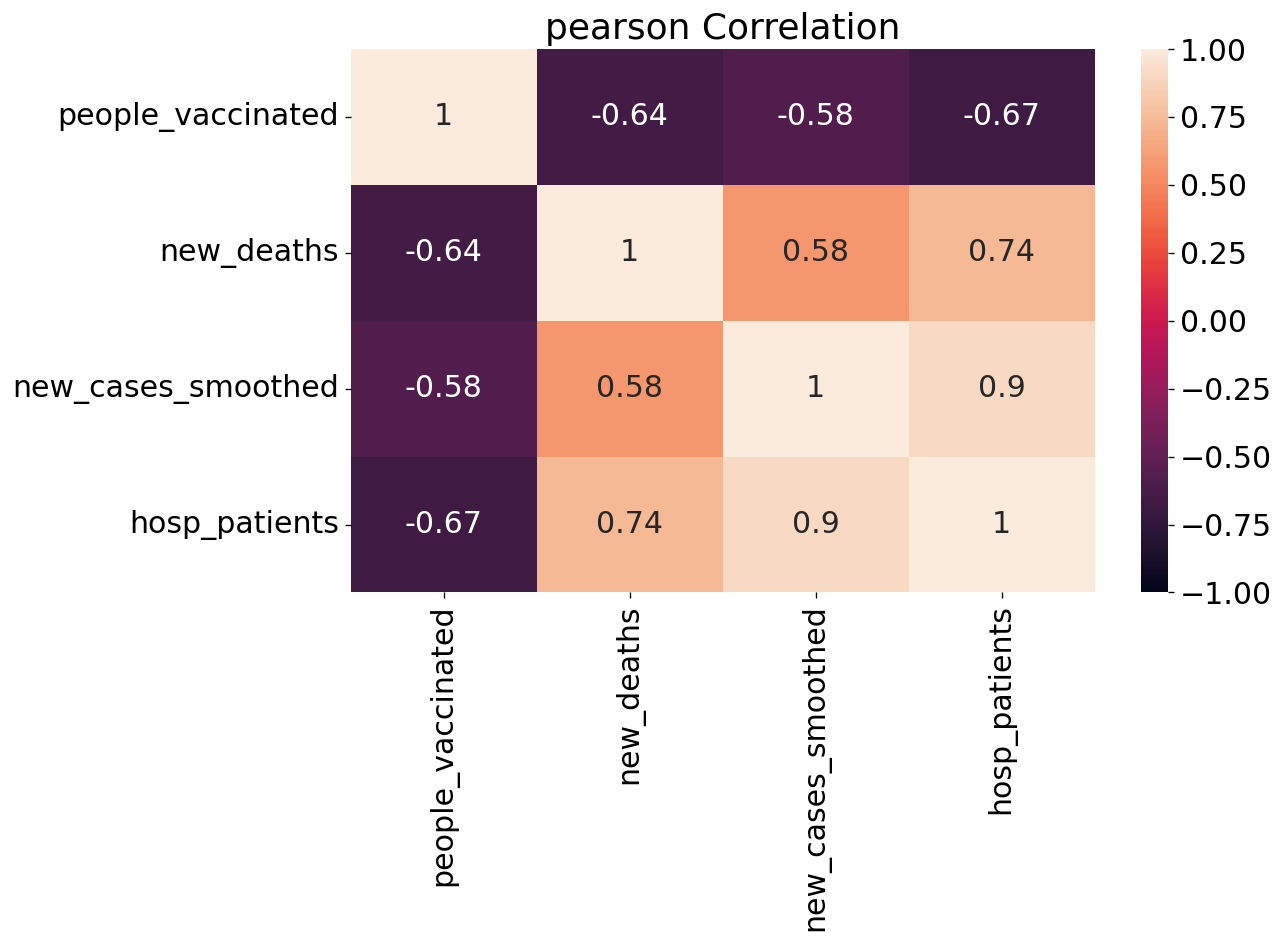

In [69]:
display_correlation(Total)

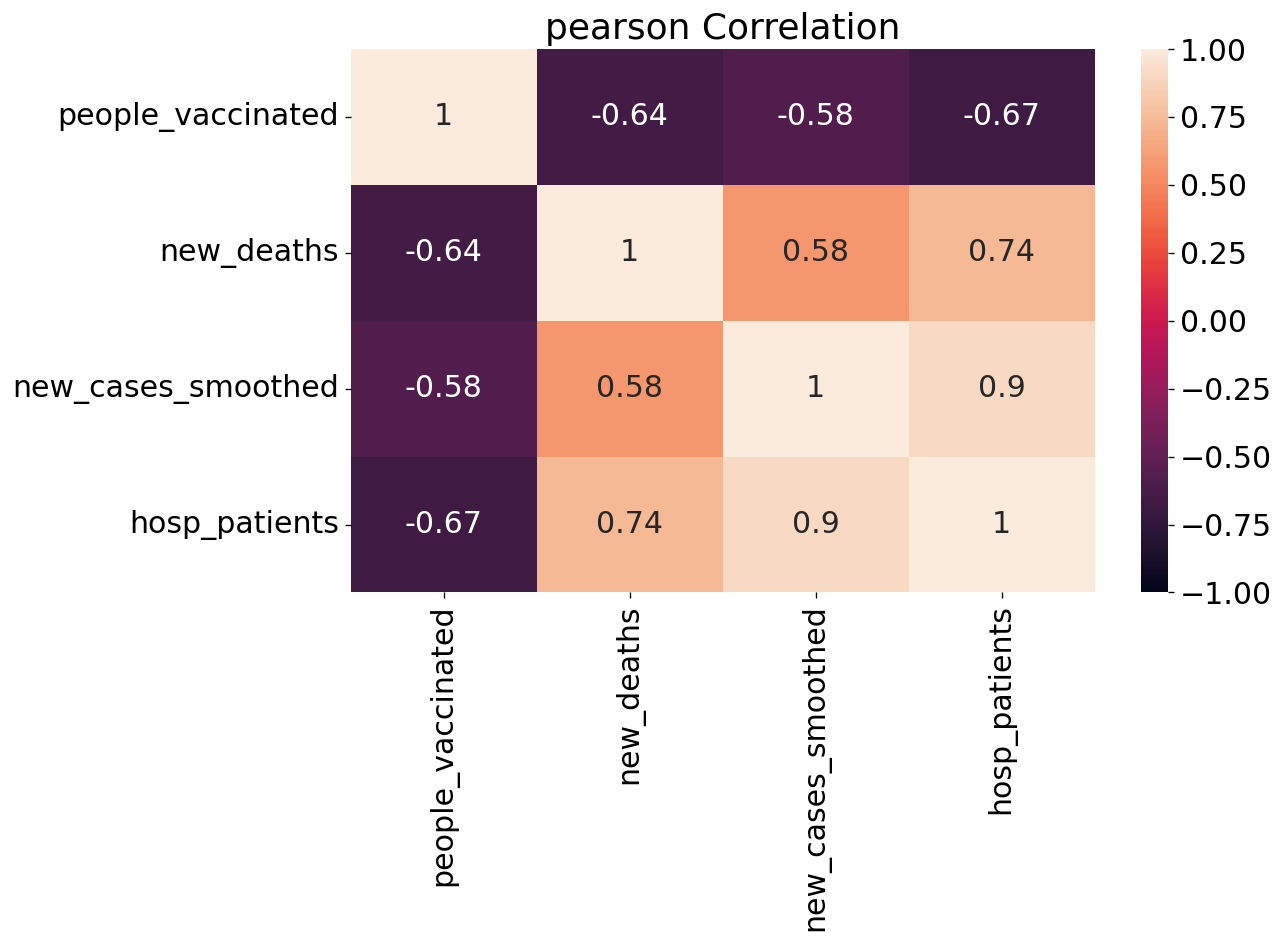

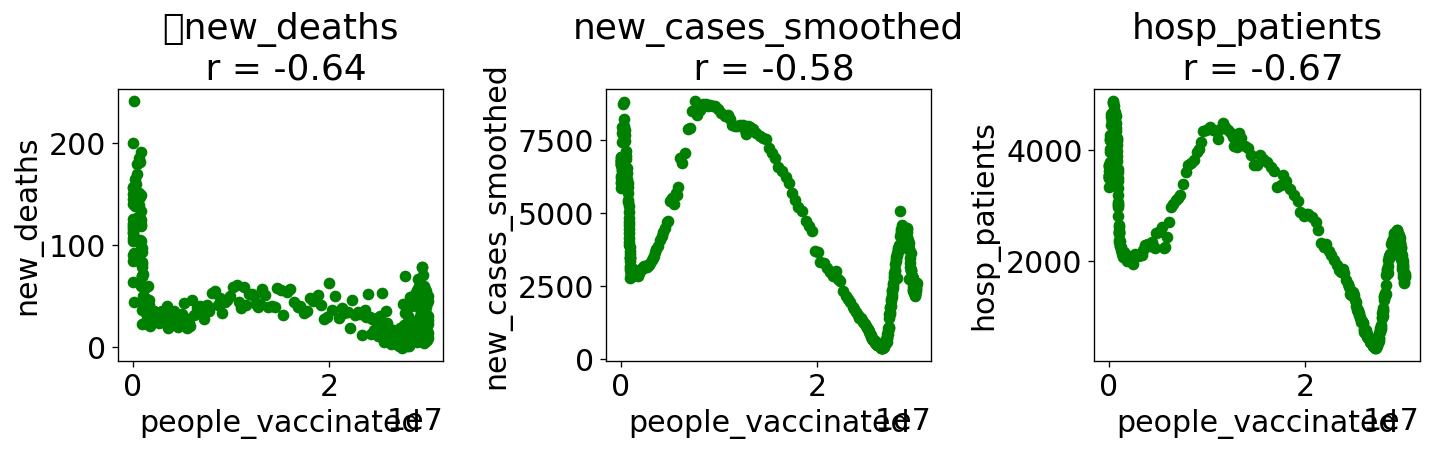

In [70]:
plot_data_corr(Total,["people_vaccinated","	new_deaths","new_cases_smoothed","hosp_patients"],color="green")

 Here is a correlation chart that shows the realtionship between people that are vaccinated, new cases of Covid 19, Number of Hospital Patient and Number of new Deaths. I decided to explore the relationship between the number of people vaccinated and these three other stats.
    

    
The Number of People vaccinged has the strongest negative correlation with the number of hos patientss and the least with the new cases. This trend is expected as researchers believd the vaccine would help greatly in preventing deaths and serious illness more than the eradication of new cases. 

In [71]:
from scipy import stats
stats.pointbiserialr(Total['people_vaccinated'], Total['new_deaths'])

PointbiserialrResult(correlation=-0.6444678605960552, pvalue=2.710182773627906e-41)

In [72]:
stats.pearsonr(Total['people_vaccinated'], Total['new_deaths'])

(-0.6444678605960552, 2.710182773627906e-41)

In [73]:
np.corrcoef(Total['people_vaccinated'], Total['new_deaths'])

array([[ 1.        , -0.64446786],
       [-0.64446786,  1.        ]])

In [74]:
d = np.polyfit(Total['people_vaccinated'],Total['new_deaths'],1)
f = np.poly1d(d)
Total.insert(4,'Treg',f(Total['people_vaccinated']))

<AxesSubplot:xlabel='people_vaccinated', ylabel='new_deaths'>

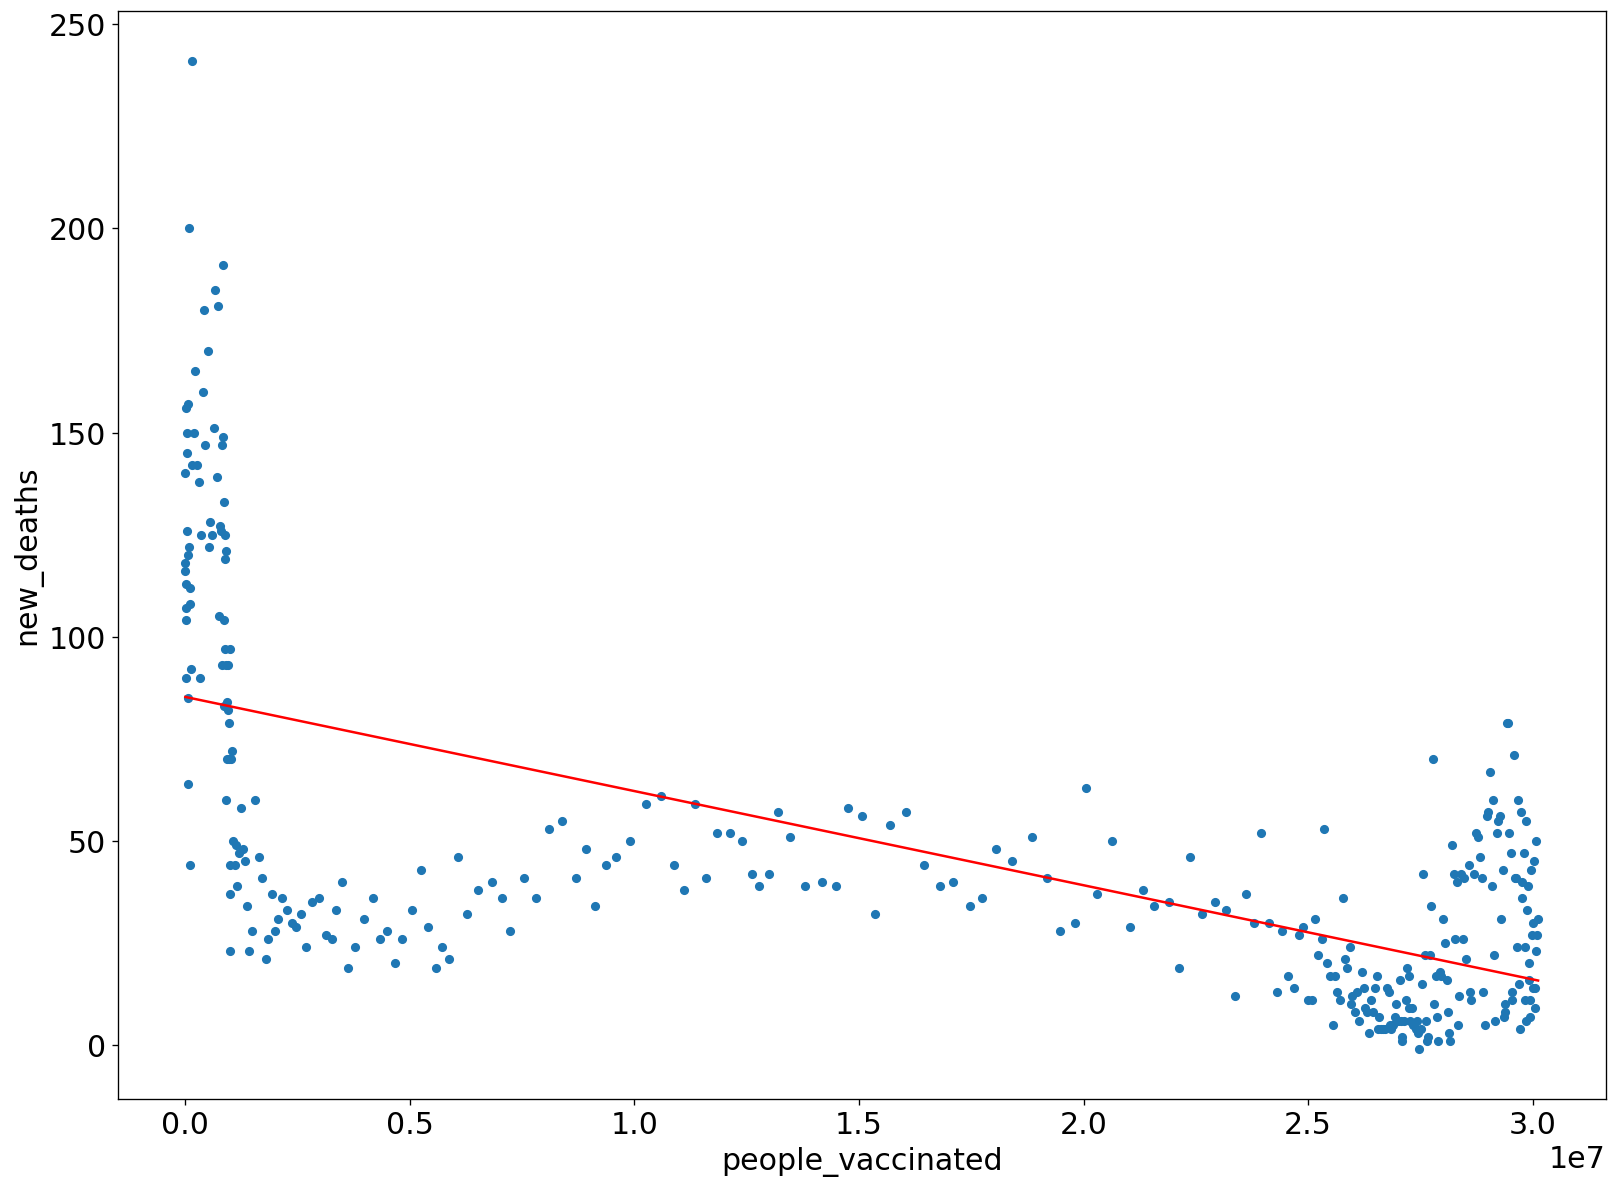

In [75]:
ax=Total.plot.scatter(x='people_vaccinated', y='new_deaths')
Total.plot(x='people_vaccinated',y='Treg',color='Red',legend=False,ax=ax)



In [76]:
import numpy as np
from sklearn.linear_model import LinearRegression
X=Total['people_vaccinated'].values
y=Total['new_deaths'].values
X=X.reshape(-1,1)
y=y.reshape(-1,1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.4153388233412565

This implies that 41.5% of the variability of the dependent variable in the data set has been accounted for, and the remaining 58.5% of the variability is still unaccounted for.

In [77]:
Total = worldstats.loc[worldstats['location'] == 'United Kingdom']
Total

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126233,GBR,Europe,United Kingdom,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126234,GBR,Europe,United Kingdom,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126235,GBR,Europe,United Kingdom,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,-1956.3,-2.68,-5.6,-28.681759
126236,GBR,Europe,United Kingdom,2020-02-03,8.0,6.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126237,GBR,Europe,United Kingdom,2020-02-04,8.0,0.0,NaN,NaN,NaN,NaN,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126887,GBR,Europe,United Kingdom,2021-11-15,9649233.0,40665.0,38563.857,143384.0,47.0,155.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126888,GBR,Europe,United Kingdom,2021-11-16,9686363.0,37130.0,39168.286,143598.0,214.0,148.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126889,GBR,Europe,United Kingdom,2021-11-17,9724617.0,38254.0,38961.857,143799.0,201.0,146.714,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN
126890,GBR,Europe,United Kingdom,2021-11-18,9772670.0,48053.0,39610.714,143999.0,200.0,146.857,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


In [78]:
Total = Total[['new_deaths','date', 'new_cases_smoothed','people_vaccinated','hosp_patients']]
datetime_series = pd.to_datetime(Total['date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
Total = Total.set_index(datetime_index)
Total.drop('date',axis=1,inplace=True)
Total = Total[['people_vaccinated','new_deaths','new_cases_smoothed','hosp_patients']]

In [79]:
Total

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
2020-01-31,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN
...,...,...,...,...
2021-11-15,50614550.0,47.0,38563.857,8715.0
2021-11-16,50645981.0,214.0,39168.286,8434.0
2021-11-17,50679073.0,201.0,38961.857,8174.0
2021-11-18,50707953.0,200.0,39610.714,NaN


In [80]:
Total = Total.drop(Total[Total.people_vaccinated.isna()].index)
Total.head()

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
2021-01-10,2286572.0,567.0,59809.857,35391.0
2021-01-11,2431648.0,529.0,58003.000,36751.0
2021-01-12,2639309.0,1246.0,55797.429,36981.0
2021-01-13,2918252.0,1568.0,53669.714,37487.0
2021-01-14,3234946.0,1253.0,53100.714,37691.0


In [81]:
Total.isna().sum()

people_vaccinated     0
new_deaths            0
new_cases_smoothed    0
hosp_patients         1
dtype: int64

In [82]:
Total = Total.drop(Total[Total.hosp_patients.isna()].index)
Total.tail()

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
2021-11-13,50559566.0,158.0,36468.429,8479.0
2021-11-14,50582504.0,63.0,37372.429,8562.0
2021-11-15,50614550.0,47.0,38563.857,8715.0
2021-11-16,50645981.0,214.0,39168.286,8434.0
2021-11-17,50679073.0,201.0,38961.857,8174.0


In [83]:
def plot_data_corr(df,title,color="green"):    
    r = display_correlation(df)
    fig, ax = plt.subplots(nrows=1, ncols=len(df.columns)-1,figsize=(14,3))
    for i in range(1,len(df.columns)):
        ax[i-1].scatter(df['people_vaccinated'],df.values[:,i],color=color)
        ax[i-1].title.set_text(title[i] +'\n r = ' + 
                             "{:.2f}".format(r.values[0,i]))
        ax[i-1].set(xlabel=df.columns[0],ylabel=df.columns[i])
    fig.subplots_adjust(wspace=.7)    
    plt.show()

In [84]:
def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(12,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Pearson Correlation")
    return(r)

,people_vaccinated,new_deaths,new_cases_smoothed,hosp_patients
people_vaccinated,1.000000,-0.706972,0.247611,-0.740433
new_deaths,-0.706972,1.000000,0.311470,0.906120
new_cases_smoothed,0.247611,0.311470,1.000000,0.415993
hosp_patients,-0.740433,0.906120,0.415993,1.000000


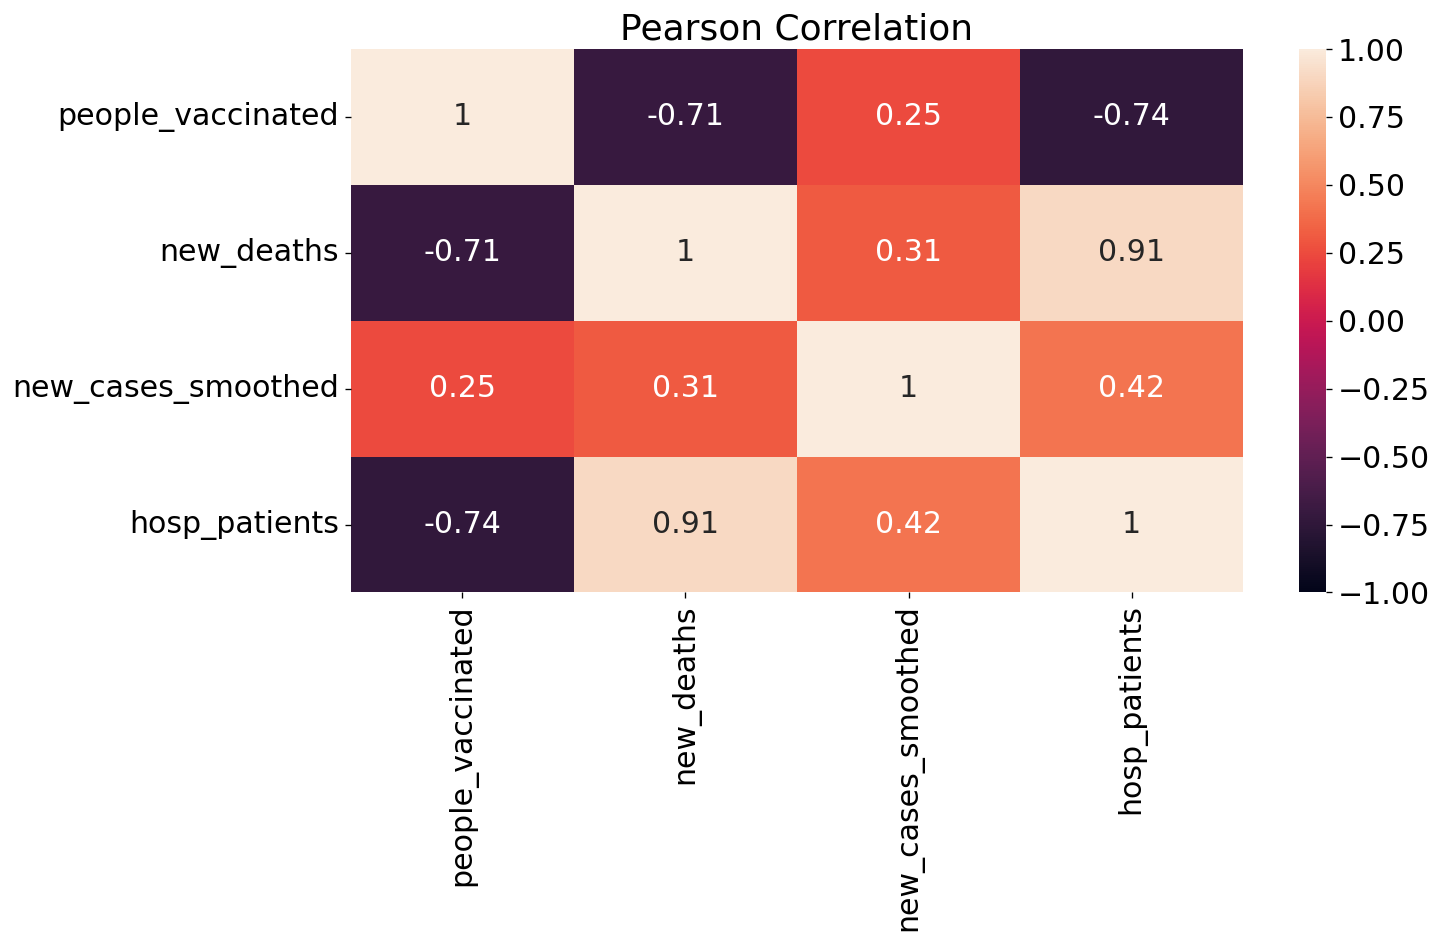

In [85]:
display_correlation(Total)

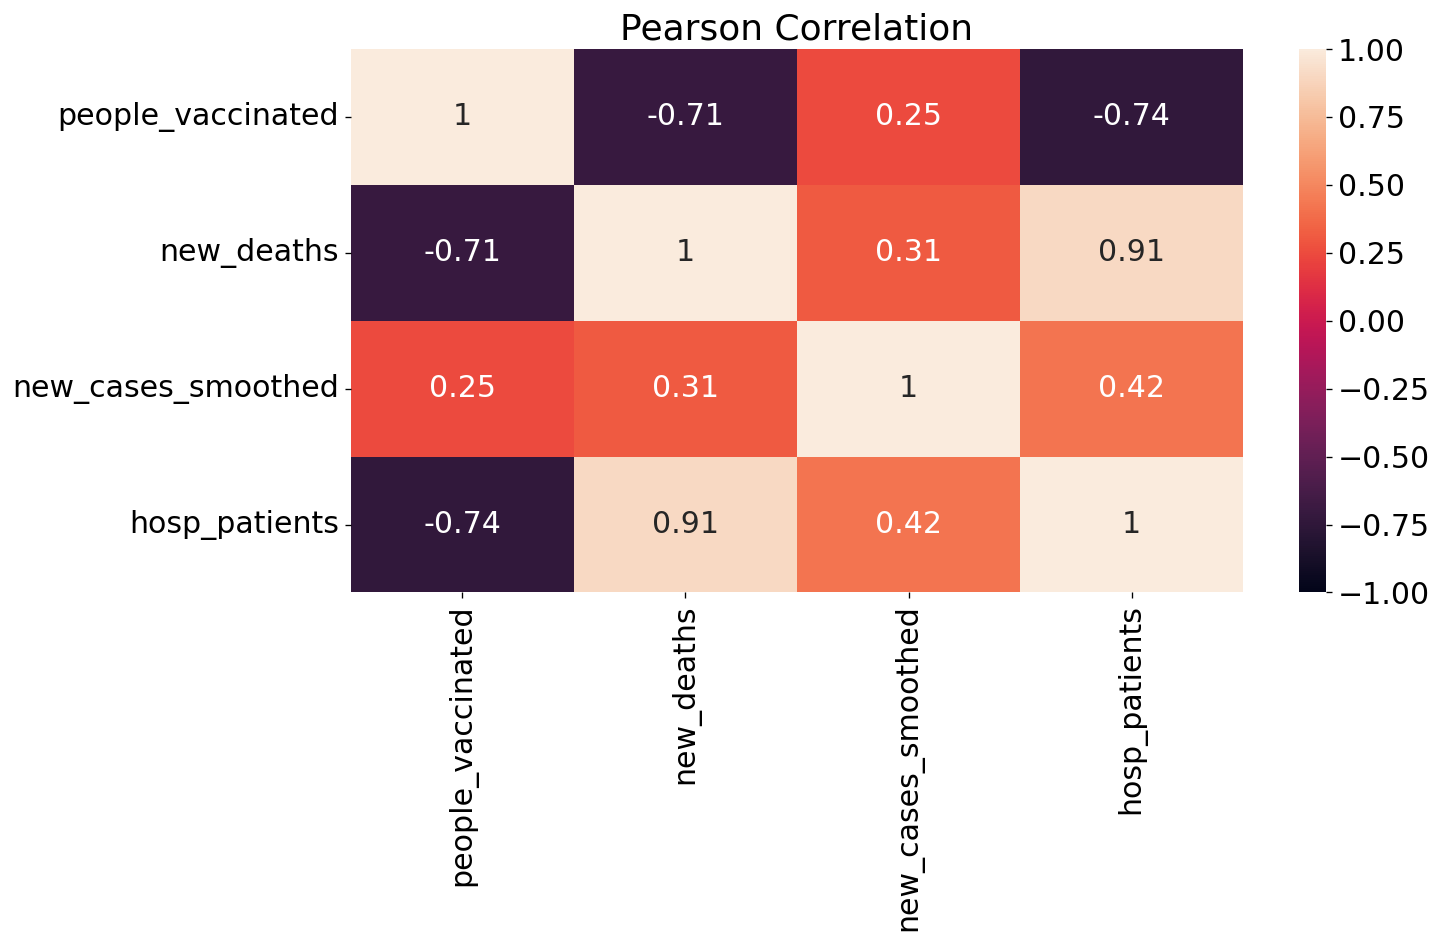

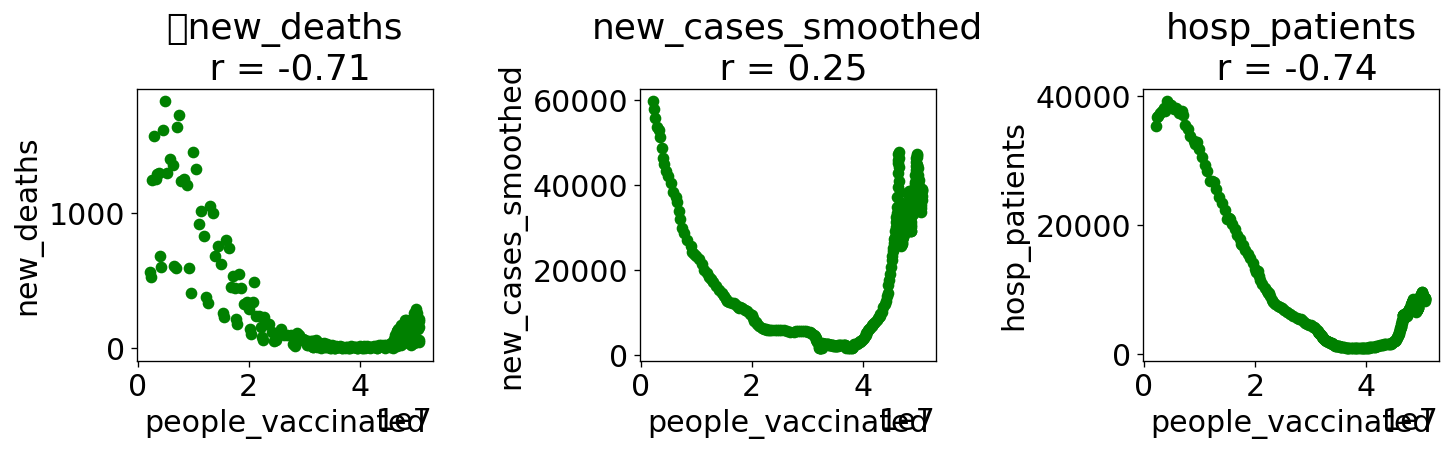

In [86]:
plot_data_corr(Total,["people_vaccinated","	new_deaths","new_cases_smoothed","hosp_patients"],color="green")

For the United Kingdom The Number of People vaccinated has the strongest negative correlation with the number of hospital patients and Surprisingly a positive correlation value with the new COVID 19 cases. The trend is expected as researchers believd the vaccine would help greatly in preventing deaths and serious illness more than the eradication of new cases. It is also believed that the reason for positive correlation value with people vaccinated is a result of the various variants of which one had its origin in that particular country.

In [87]:
stats.pointbiserialr(Total['people_vaccinated'], Total['new_deaths'])

PointbiserialrResult(correlation=-0.7069720057346273, pvalue=1.4829580923993815e-48)

In [88]:
stats.pearsonr(Total['people_vaccinated'], Total['new_deaths'])

(-0.7069720057346273, 1.4829580923993815e-48)

In [89]:
np.corrcoef(Total['people_vaccinated'], Total['new_deaths'])

array([[ 1.        , -0.70697201],
       [-0.70697201,  1.        ]])

In [90]:
d = np.polyfit(Total['people_vaccinated'],Total['new_deaths'],1)
f = np.poly1d(d)
Total.insert(4,'Treg',f(Total['people_vaccinated']))

<AxesSubplot:xlabel='people_vaccinated', ylabel='new_deaths'>

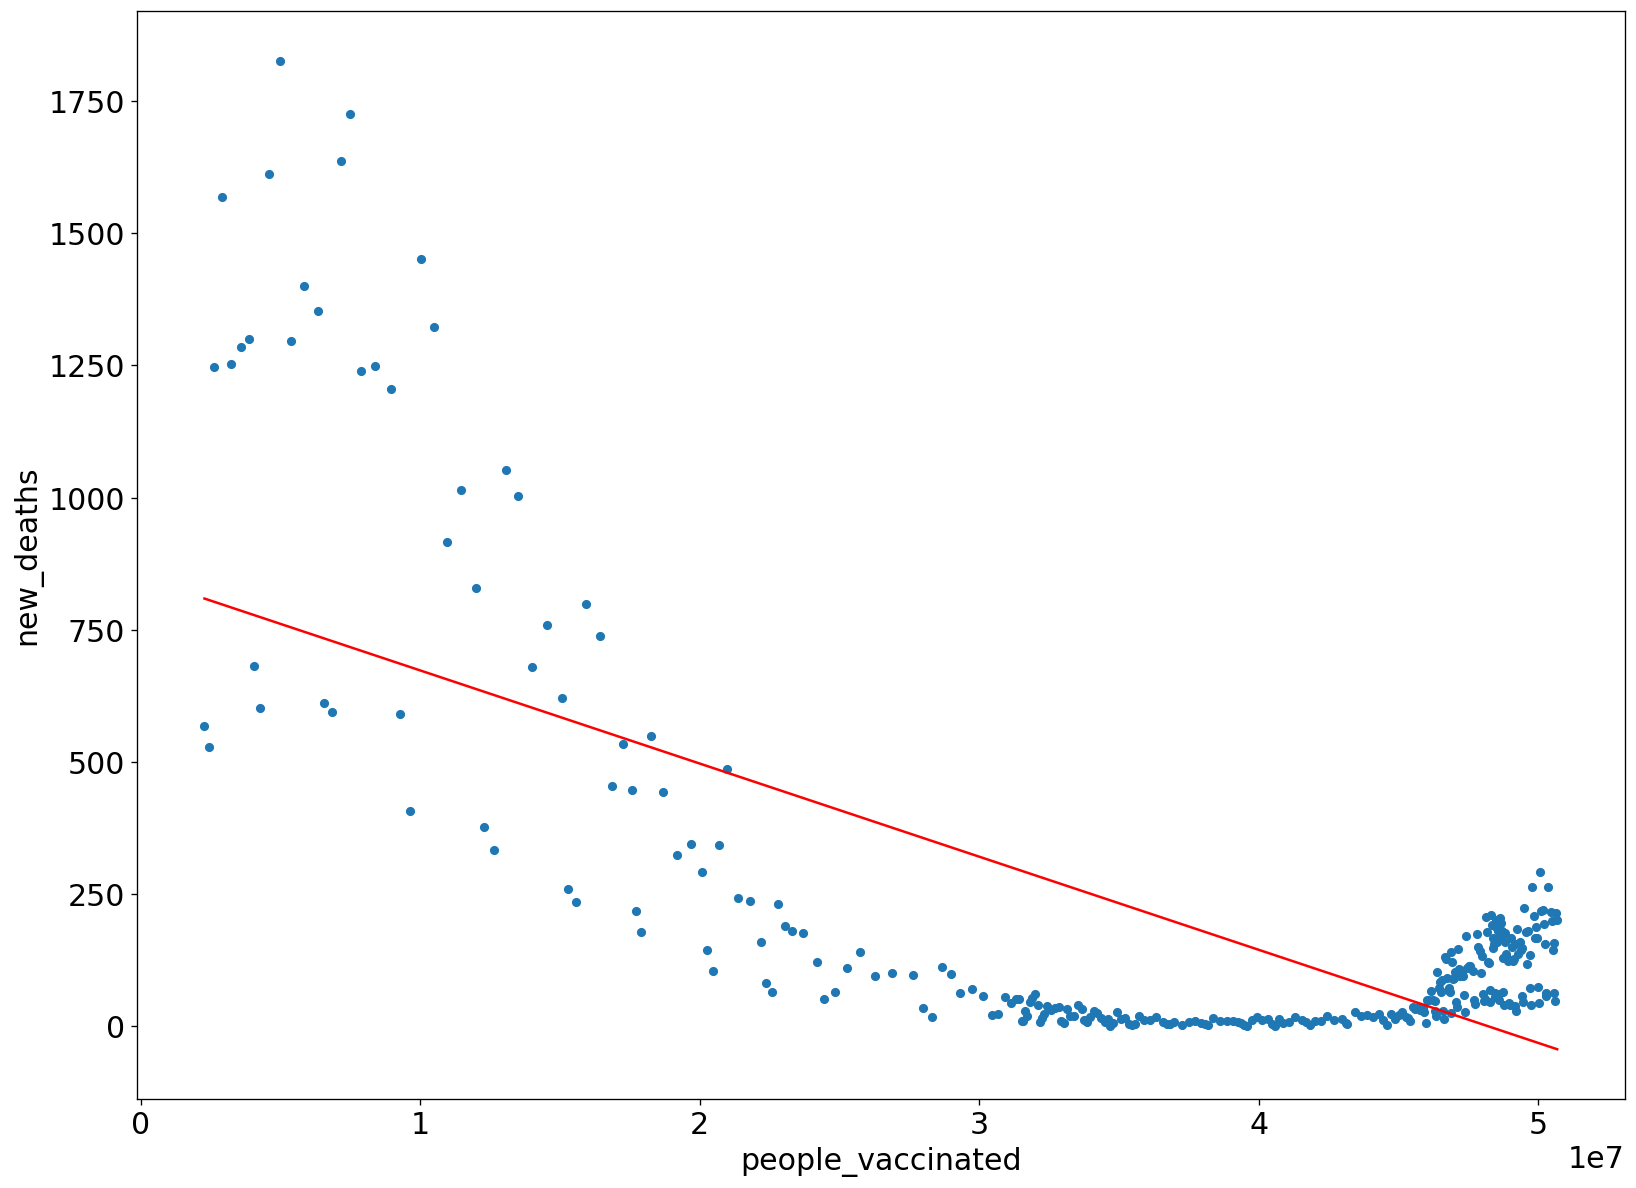

In [91]:
ax=Total.plot.scatter(x='people_vaccinated', y='new_deaths')
Total.plot(x='people_vaccinated',y='Treg',color='Red',legend=False,ax=ax)




In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression
X=Total['people_vaccinated'].values
y=Total['new_deaths'].values
X=X.reshape(-1,1)
y=y.reshape(-1,1)
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.4998094168924426

This implies that 49.98% of the variability of the dependent variable in the data set has been accounted for, and the remaining 50.02% of the variability is still unaccounted for.

<h2> SECTION 5

Using the  findings  from  your  models  in Sections 3 and 4 on the coronavirus vaccination 
rates, you are now tasked with discussing the effect of vaccination on our daily lives. Which 
of your chosen countries has the most effective vaccination program? From what aspects? 
Why?  What  discoveries  have  you  made  as  a  result  of  the  dataset  and  your  models? Use 
evidence-based  insights  derived  about  the  disease  from  your  model(s)  and  your  data 
analysis to justify your findings.

There may be many factors or features affecting the vaccination rate in a country. This simple time series analysis by ARIMA forecasting equation is only considering a linear relationship between the days and vaccination rate in which the predictors comprised of lags of the dependent feature (here vaccination rate) and lags of the forecasting errors. And our model shows us that Canada would have higher vaccination rate in the next coming 50 days

Sections 3 and 4 have provided valuable insights in the vaccination rates for Canada and United Kingdom. From the prediction of our Models both Countries are expected to have increases in the people vaccinated per hundred in the coming 50 days.

Section 4 also provides proof as to that the vaccination campaign is working as that for the two countries we see that an increase in people vaccinated there's a decrease in the number of Hosp patients and new deaths. This further provides credibility that the vaccine reduces the risk of death and Serious Illnesses. The United Kingdom has more negative correlation to the number of Hosp patients and new deaths and I attribute that to the United Kingdom having achieved 50 people per hundred vaccinated months earlier than canada. 

Another Important point of Discussion is that the United Kingdom has a positve correlation for new cases whereas Canada does not. I attribute this the slowing down of the UK vaccination rate after reaching about 50 people per hundred and the new variants which originated. This i believe is a point in which countries must consider as they must not relent in their vaccination drives but must strive to achieve 95% vaccination rate if they are to beat this pandemic. It is also important to note that the United Kingdom started enjoying the dividends of High vaccination rates in terms of less number of hospitalization and deaths than Canada but not keeping up with the momentum has led to increase in new cases which is in line with what scientist expect. Without thorough population vaccination new variants will originate and further excarbate the situation.

Therefore if Canada can keep up with the momemtum as our ARIMA model suggest we expect them to reach 80 people vaccinated per hundred in the next 50 days and from my analysis they currently have a better vaccination program and I expect to see the dividends in the coming days barring the discovery of any more contagious variants.